## Welcome to B133 Team 4's notebook!

Today, we will be doing a Severity prediction analysis on a USA Car Accident dataset taken on kaggle. Without further ado, let's go!

These are our notebook's table of contents: 

#### 1) Introduction
- Motivation
- Importing The Dataset

#### 2) Data preprocessing 
- Feature Selection 
- Handling Unbalanced Data

#### 3) Exploratory Data Analysis (EDA)
- Barplot Explorations
- Categorical Correlation
- Numerical Correlation
- Outlier Removals

#### 4) Models
- Normalization of features
- Logistic Regression
- Random Forest Classification

#### 5) Results
- Model Comparisons

#### 6) Analysis & Conclusion

# Motivation

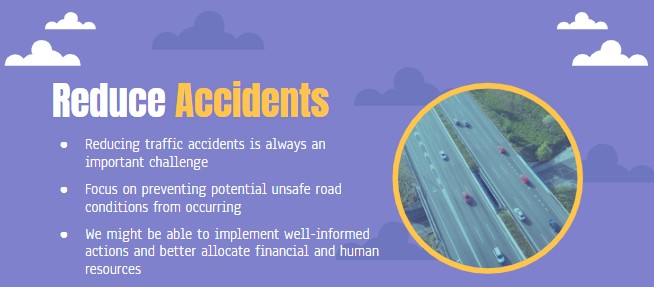

Reducing traffic accidents has truly been a challenge. An important area we can focus on with regards to road safety issues will be to prevent unsafe road conditions. Accident and severity prediction are very crucial in helping us solve this issue. We hope to be able to identify the patterns of how these accidents happen and the key factors that affect them. From there, we will be able to come up with recommendations to promote safer driving habits.

# Dataset

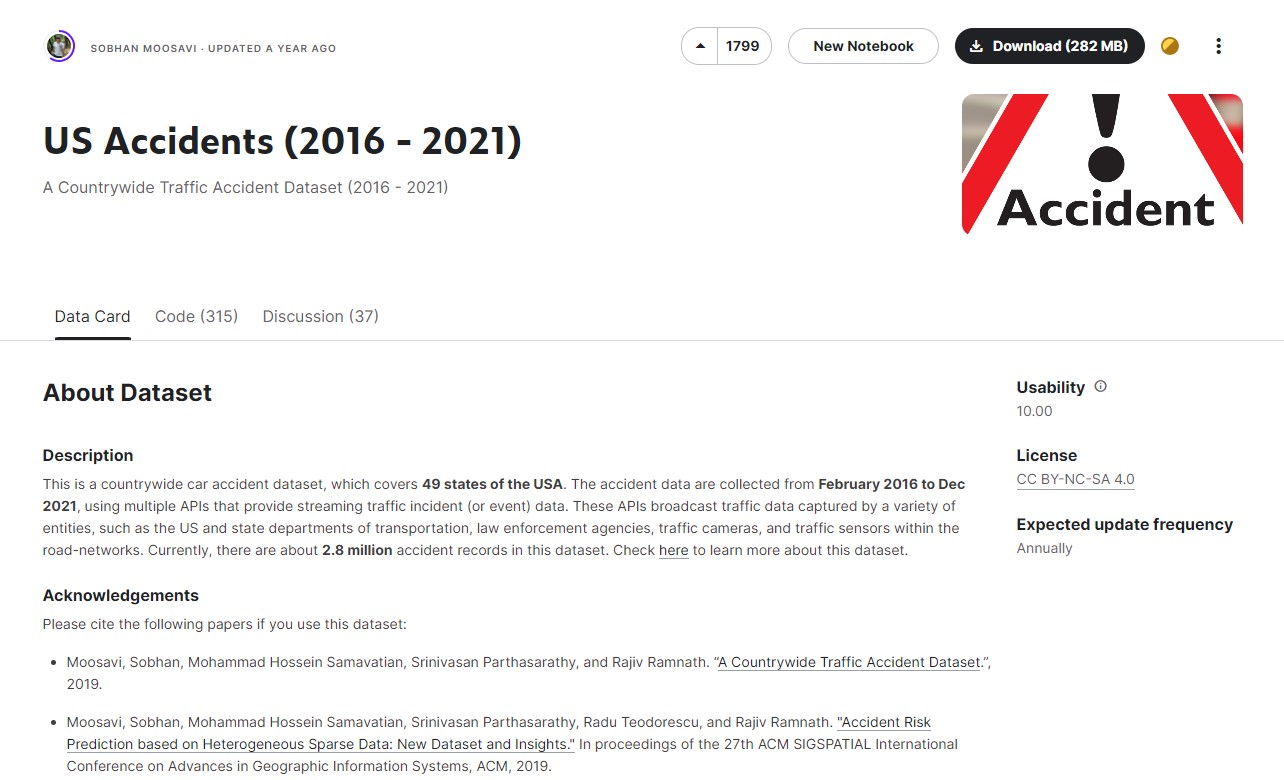

Link to the dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Our dataset was taken from Kaggle containing USA car accident data that were accumulated from February 2016 to December 2021 in over 49 states. 

Note: Our focus will be understanding which factors will help us in the prediction of the accident severity (Major or Minor) so we will not be taking into account any specific USA location data such as the County and State etc.

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from plotnine import *
from scipy.stats import levene
from scipy.stats import pointbiserialr
import scipy.stats as ss
%matplotlib inline

In [2]:
#read data
accident_data = pd.read_csv('US_Accidents_Dec21_updated.csv')

# View first few columns of data
accident_data.head(100)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0     A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1     A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2     A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3     A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4     A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   
..    ...       ...                  ...                  ...        ...   
95   A-96         2  2016-02-11 07:47:57  2016-02-11 13:47:57  41.377170   
96   A-97         2  2016-02-11 07:58:15  2016-02-11 13:58:15  39.173970   
97   A-98         2  2016-02-11 08:28:42  2016-02-11 14:28:42  39.755130   
98   A-99         2  2016-02-11 08:40:21  2016-02-11 14:40:21  39.173970   
99  A-100         2  2016-02-11 08:42:57  2016-02-11 14:42:57  41.126240   

    Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0  -83.092860  40.112060 -83.031870         3.230   
1  -84.062800  39.865010 -84.048730         0.747   
2  -84.524680  39.102090 -84.523960         0.055   
3  -81.537840  41.062170 -81.535470         0.123   
4  -84.492792  39.170476 -84.501798         0.500   
..        ...        ...        ...           ...   
95 -81.513900  41.368280 -81.516470         0.629   
96 -84.490310  39.176500 -84.487570         0.228   
97 -84.166140  39.754240 -84.155980         0.543   
98 -84.490310  39.176500 -84.487570         0.228   
99 -81.652990  41.119210 -81.636580         0.983   

                                          Description  Number       Street  \
0   Between Sawmill Rd/Exit 20 and OH-315/Olentang...     NaN  Outerbelt E   
1                  At OH-4/OH-235/Exit 41 - Accident.     NaN       I-70 E   
2                    At I-71/US-50/Exit 1 - Accident.     NaN       I-75 S   
3                     At Dart Ave/Exit 21 - Accident.     NaN       I-77 N   
4                  At Mitchell Ave/Exit 6 - Accident.     NaN       I-75 S   
..                                                ...     ...          ...   
95      At Broadway Ave/Forbes Rd/Exit 23 - Accident.     NaN      I-480 E   
96                       At OH-562/Exit 7 - Accident.     NaN       I-75 N   
97                   At Steve Whalen Blvd - Accident.     NaN      US-35 E   
98                       At OH-562/Exit 7 - Accident.     NaN       I-75 N   
99  Between OH-21/Exit 136 and Cleveland Massillon...     NaN       I-77 S   

   Side        City      County State Zipcode Country    Timezone  \
0     R      Dublin    Franklin    OH   43017      US  US/Eastern   
1     R      Dayton  Montgomery    OH   45424      US  US/Eastern   
2     R  Cincinnati    Hamilton    OH   45203      US  US/Eastern   
3     R       Akron      Summit    OH   44311      US  US/Eastern   
4     R  Cincinnati    Hamilton    OH   45217      US  US/Eastern   
..  ...         ...         ...   ...     ...     ...         ...   
95    R     Bedford    Cuyahoga    OH   44146      US  US/Eastern   
96    R  Cincinnati    Hamilton    OH   45237      US  US/Eastern   
97    R      Dayton  Montgomery    OH   45410      US  US/Eastern   
98    R  Cincinnati    Hamilton    OH   45237      US  US/Eastern   
99    R       Akron      Summit    OH   44321      US  US/Eastern   

   Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0          KOSU  2016-02-08 00:53:00            42.1           36.1   
1          KFFO  2016-02-08 05:58:00            36.9            NaN   
2          KLUK  2016-02-08 05:53:00            36.0            NaN   
3          KAKR  2016-02-08 06:54:00            39.0            NaN   
4          KLUK  2016-02-08 07:53:00            37.0           29.8   
..          ...                  ...             ...            ...   
95         KBKL  2016-02-11 07:53:00            18.0           -0.5   
96         KLUK  2016-02-11 07:53:00            15.1            9.4   
97         KFFO  2016-02-11 08:58:00             9.1

In [3]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## Removing Columns that are not useful 

In [4]:
#Dropping columns that are not useful
accident_new = accident_data.drop(['ID', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'City', 'Zipcode','Country', 'State', 'Timezone', 'Airport_Code', 'End_Time'], axis=1)

In [5]:
accident_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 31 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Side                   object 
 3   County                 object 
 4   Weather_Timestamp      object 
 5   Temperature(F)         float64
 6   Wind_Chill(F)          float64
 7   Humidity(%)            float64
 8   Pressure(in)           float64
 9   Visibility(mi)         float64
 10  Wind_Direction         object 
 11  Wind_Speed(mph)        float64
 12  Precipitation(in)      float64
 13  Weather_Condition      object 
 14  Amenity                bool   
 15  Bump                   bool   
 16  Crossing               bool   
 17  Give_Way               bool   
 18  Junction               bool   
 19  No_Exit                bool   
 20  Railway                bool   
 21  Roundabout             bool   
 22  Station           

## Dropping NA columns

In [6]:
#Checking for NA values
accident_new.isna()

Severity  Start_Time   Side  County  Weather_Timestamp  \
0           False       False  False   False              False   
1           False       False  False   False              False   
2           False       False  False   False              False   
3           False       False  False   False              False   
4           False       False  False   False              False   
...           ...         ...    ...     ...                ...   
2845337     False       False  False   False              False   
2845338     False       False  False   False              False   
2845339     False       False  False   False              False   
2845340     False       False  False   False              False   
2845341     False       False  False   False              False   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0                 False          False        False         False   
1                 False           True        False         False   
2                 False           True        False         False   
3                 False           True        False         False   
4                 False          False        False         False   
...                 ...            ...          ...           ...   
2845337           False          False        False         False   
2845338           False          False        False         False   
2845339           False          False        False         False   
2845340           False          False        False         False   
2845341           False          False        False         False   

         Visibility(mi)  Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0                 False           False            False              False   
1                 False           False             True              False   
2                 False           False             True              False   
3                 False           False             True               True   
4                 False           False            False              False   
...                 ...             ...              ...                ...   
2845337           False           False            False              False   
2845338           False           False            False              False   
2845339           False           False            False              False   
2845340           False           False            False              False   
2845341           False           False            False              False   

         Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
0                    False    False  False     False     False     False   
1                    False    False  False     False     False     False   
2                    False    False  False     False     False     False   
3                    False    False  False     False     False     False   
4                    False    False  False     False     False     False   
...                    ...      ...    ...       ...       ...       ...   
2845337              False    False  False     False     False     False   
2845338              False    False  False     False     False     False   
2845339              False    False  False     False     False     False   
2845340              False    False  False     False     False     False   
2845341              False    False  False     False     False     False   

         No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0          False    False       False    False  False            False   
1          False    False       False    False  False            False   
2          False    False       False    False  False            False   
3          False    False       False    False  False            False   
4          False    False       False    False  False            False   
...          ...      ...         ...      ...    ...              ..

In [7]:
#Drop NA values
accident = accident_new.dropna()

In [8]:
#Verify NA values are dropped
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207326 entries, 0 to 2845341
Data columns (total 31 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Side                   object 
 3   County                 object 
 4   Weather_Timestamp      object 
 5   Temperature(F)         float64
 6   Wind_Chill(F)          float64
 7   Humidity(%)            float64
 8   Pressure(in)           float64
 9   Visibility(mi)         float64
 10  Wind_Direction         object 
 11  Wind_Speed(mph)        float64
 12  Precipitation(in)      float64
 13  Weather_Condition      object 
 14  Amenity                bool   
 15  Bump                   bool   
 16  Crossing               bool   
 17  Give_Way               bool   
 18  Junction               bool   
 19  No_Exit                bool   
 20  Railway                bool   
 21  Roundabout             bool   
 22  Station           

### Changing Severity and viewing its distribution

In [9]:
#Conditions to classify "Severity" data as "Minor" or "Major"
minor_cond = accident['Severity'] < 3
major_cond = accident['Severity'] > 2

#Replacing data in "Severity" column
accident.loc[minor_cond,'Severity'] = 2
accident.loc[major_cond,'Severity'] = 1

accident.head()

Severity           Start_Time Side    County    Weather_Timestamp  \
0          1  2016-02-08 00:37:08    R  Franklin  2016-02-08 00:53:00   
4          1  2016-02-08 07:53:43    R  Hamilton  2016-02-08 07:53:00   
7          2  2016-02-08 11:51:46    R  Cuyahoga  2016-02-08 11:51:00   
9          2  2016-02-08 15:16:43    R  Franklin  2016-02-08 15:12:00   
10         2  2016-02-08 15:43:50    R  Hamilton  2016-02-08 15:47:00   

    Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0             42.1           36.1         58.0         29.76            10.0   
4             37.0           29.8         93.0         29.69            10.0   
7             33.1           30.0         92.0         29.63             0.5   
9             32.0           28.7        100.0         29.59             0.5   
10            33.8           29.6        100.0         29.66             3.0   

   Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0              SW             10.4               0.00        Light Rain   
4             WSW             10.4               0.01        Light Rain   
7              SW              3.5               0.08              Snow   
9            West              3.5               0.05              Snow   
10            NNW              4.6               0.03        Light Snow   

    Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0     False  False     False     False     False    False    False   
4     False  False     False     False     False    False    False   
7     False  False     False     False      True    False    False   
9     False  False     False     False     False    False    False   
10    False  False     False     False     False    False    False   

    Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0        False    False  False            False           False         False   
4        False    False  False            False           False         False   
7        False    False  False            False           False         False   
9        False    False  False            False           False         False   
10       False    False  False            False           False         False   

   Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0           Night          Night             Night                 Night  
4             Day            Day               Day                   Day  
7             Day            Day               Day                   Day  
9             Day            Day               Day                   Day  
10            Day            Day               Day                   Day

2    2080632
1     126694
Name: Severity, dtype: int64


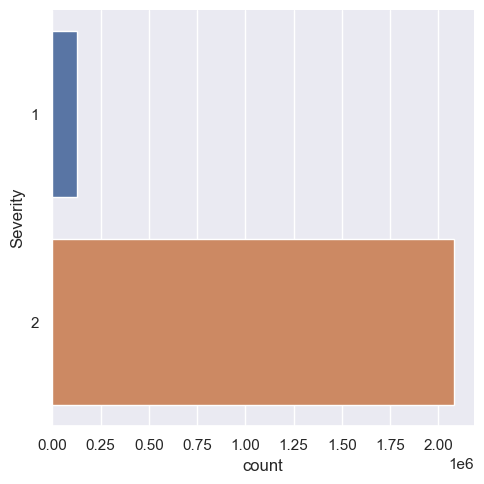

In [10]:
#Barplot of distributions of Major and Minor accident
print(accident["Severity"].value_counts())
sb.catplot(y = "Severity", data = accident, kind = "count")

The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher.

So, in order to balance the data we are going to undersample all the categories to the number of records of the minority category, in this case the severity 1. We thought this was a good choice since this leaves us with a good amount of records for each category, which is ~25k records

### Balancing the Dataset

In [11]:
size = len(accident[accident["Severity"]== 1].index)
df = pd.DataFrame()
for i in range(1,3):
    S = accident[accident["Severity"]==i]
    df = df.append(S.sample(size, random_state=42))
dfaccident = df

/var/folders/6z/84yjcf7x7pl5b8ltxz93scj40000gn/T/ipykernel_13127/1378709387.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/6z/84yjcf7x7pl5b8ltxz93scj40000gn/T/ipykernel_13127/1378709387.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [12]:
#Conditions to classify "Severity" data as "Minor" or "Major"
minor_condition = dfaccident['Severity'] > 1 
major_condition = dfaccident['Severity'] < 2

#Replacing data in "Severity" column
dfaccident.loc[minor_condition,'Severity'] = "Minor"
dfaccident.loc[major_condition,'Severity'] = "Major"

dfaccident.head()

Severity           Start_Time Side    County    Weather_Timestamp  \
2810728    Major  2019-06-23 23:14:09    L     Butte  2019-06-23 22:53:00   
2209389    Major  2020-03-20 17:49:32    R   Suffolk  2020-03-20 17:56:00   
2218144    Major  2020-03-24 19:00:25    R  Davidson  2020-03-24 18:53:00   
2792571    Major  2019-05-16 16:18:00    R     Adams  2019-05-16 15:58:00   
832345     Major  2021-10-15 15:56:30    R   Daviess  2021-10-15 15:56:00   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
2810728            82.0           82.0         38.0         29.65   
2209389            59.0           59.0         81.0         29.68   
2218144            61.0           61.0         90.0         29.10   
2792571            75.0           75.0         25.0         24.20   
832345             79.0           79.0         62.0         29.39   

         Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
2810728            10.0            ENE              9.0               0.00   
2209389            10.0            SSW             15.0               0.00   
2218144            10.0              W              3.0               0.06   
2792571            10.0            SSE             10.0               0.00   
832345             10.0              W              8.0               0.00   

        Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
2810728              Fair    False  False     False     False     False   
2209389     Mostly Cloudy    False  False      True     False     False   
2218144            Cloudy    False  False     False     False     False   
2792571            Cloudy    False  False     False     False     False   
832345      Partly Cloudy    False  False     False     False     False   

         No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
2810728    False    False       False    False  False            False   
2209389    False    False       False    False  False            False   
2218144    False    False       False    False  False            False   
2792571    False    False       False    False  False            False   
832345     False    False       False    False  False            False   

         Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
2810728           False         False          Night          Night   
2209389            True         False            Day            Day   
2218144           False         False            Day            Day   
2792571           False         False            Day            Day   
832345             True         False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  
2810728             Night                 Night  
2209389               Day                   Day  
2218144               Day                   Day  
2792571               Day                   Day  
832345                Day                   Day

Major    126694
Minor    126694
Name: Severity, dtype: int64


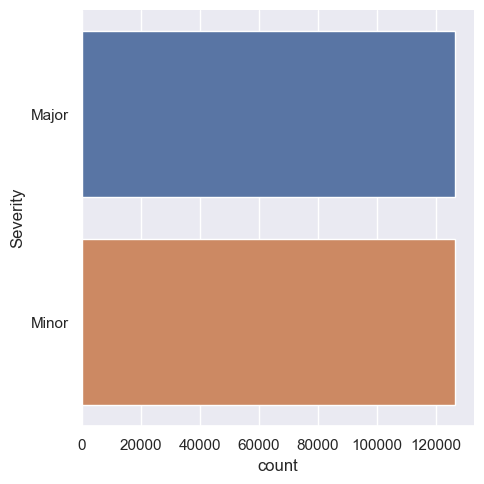

In [13]:
#Barplot of distributions of Major and Minor accident
print(dfaccident["Severity"].value_counts())
sb.catplot(y = "Severity", data = dfaccident, kind = "count")

In [14]:
#Check total number of rows in dataset
dfaccident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253388 entries, 2810728 to 2211375
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               253388 non-null  object 
 1   Start_Time             253388 non-null  object 
 2   Side                   253388 non-null  object 
 3   County                 253388 non-null  object 
 4   Weather_Timestamp      253388 non-null  object 
 5   Temperature(F)         253388 non-null  float64
 6   Wind_Chill(F)          253388 non-null  float64
 7   Humidity(%)            253388 non-null  float64
 8   Pressure(in)           253388 non-null  float64
 9   Visibility(mi)         253388 non-null  float64
 10  Wind_Direction         253388 non-null  object 
 11  Wind_Speed(mph)        253388 non-null  float64
 12  Precipitation(in)      253388 non-null  float64
 13  Weather_Condition      253388 non-null  object 
 14  Amenity                253388

## Exploratory Data Analysis

In [15]:
# Unique values in column "Weather_Condition"
accident_df = dfaccident
print(accident_df['Weather_Condition'].unique())

['Fair' 'Mostly Cloudy' 'Cloudy' 'Partly Cloudy' 'Heavy Rain' 'Light Snow'
 'Overcast' 'Haze' 'Light Rain' 'Partly Cloudy / Windy' 'Rain'
 'Light Rain with Thunder' 'Fog' 'Fair / Windy' 'Light Drizzle' 'T-Storm'
 'Light Freezing Rain' 'Mostly Cloudy / Windy' 'Thunder in the Vicinity'
 'Cloudy / Windy' 'Snow' 'Light Snow / Windy' 'Heavy Snow'
 'Light Rain / Windy' 'Drizzle' 'Sand / Dust Whirlwinds'
 'Light Freezing Drizzle' 'Wintry Mix' 'Smoke' 'Clear' 'Thunder'
 'Scattered Clouds' 'Heavy Thunderstorms and Snow' 'N/A Precipitation'
 'Shallow Fog' 'Haze / Windy' 'Heavy T-Storm' 'Light Ice Pellets'
 'Snow / Windy' 'Drizzle and Fog' 'Light Freezing Fog' 'Rain / Windy'
 'Light Sleet' 'Showers in the Vicinity' 'Widespread Dust' 'Smoke / Windy'
 'Light Drizzle / Windy' 'Mist' 'Heavy Rain / Windy'
 'Heavy Thunderstorms and Rain' 'Heavy T-Storm / Windy'
 'Light Rain Shower' 'T-Storm / Windy' 'Thunderstorms and Rain'
 'Light Freezing Rain / Windy' 'Squalls / Windy' 'Patches of Fog'
 'Snow and Sl

In [16]:
#Replacing Weather_Condition values
accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(['Snow',
            'Light Snow','Blowing Snow','Heavy Snow','Snow Grains',
            'Light Ice Pellets','Light Snow Showers','Light Snow Shower',
            'Heavy Blowing Snow','Low Drifting Snow','Light Blowing Snow',
            'Drifting Snow','Blowing Snow Nearby','Light Snow with Thunder',
            'Snow and Sleet','Heavy Snow with Thunder'], 'Snow')

accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(['Light Rain',
            'Freezing Rain','Heavy Rain Shower','Heavy Rain Showers',
            'Light Freezing Drizzle','Rain','Light Drizzle','Heavy Rain',
            'Drizzle','Rain Shower','Thunderstorms and Rain',
            'Light Thunderstorms and Rain','Rain Showers','Light Rain Showers',
            'Heavy Drizzle','Light Freezing Rain','Heavy Thunderstorms and Rain',
            'Thunderstorm','Light Rain with Thunder'], 'Rain')

accident_df['Weather_Condition'] = accident_df['Weather_Condition'].replace(['Mostly Cloudy',
            'Overcast','Cloudy','Scattered Clouds','Clear','Partly Cloudy',
            'Fair'], 'Clear')

accident_df.head(15)

Severity           Start_Time Side       County    Weather_Timestamp  \
2810728    Major  2019-06-23 23:14:09    L        Butte  2019-06-23 22:53:00   
2209389    Major  2020-03-20 17:49:32    R      Suffolk  2020-03-20 17:56:00   
2218144    Major  2020-03-24 19:00:25    R     Davidson  2020-03-24 18:53:00   
2792571    Major  2019-05-16 16:18:00    R        Adams  2019-05-16 15:58:00   
832345     Major  2021-10-15 15:56:30    R      Daviess  2021-10-15 15:56:00   
2168993    Major  2020-06-12 07:58:50    R       DuPage  2020-06-12 07:51:00   
2110750    Major  2020-05-11 10:56:33    R      Broward  2020-05-11 10:53:00   
1325409    Major  2021-12-21 11:28:00    R          Elk  2021-12-21 11:53:00   
2117061    Major  2020-05-14 09:36:42    R      Tarrant  2020-05-14 09:53:00   
2202448    Major  2020-03-16 17:24:32    R       Marion  2020-03-16 17:53:00   
2233561    Major  2020-04-02 06:05:47    R       Dallas  2020-04-02 06:20:00   
1796366    Major  2020-09-30 20:39:00    R      Madison  2020-09-30 20:53:00   
2309746    Major  2020-01-21 19:04:48    R         Cook  2020-01-21 18:52:00   
2831155    Major  2019-07-24 08:15:32    R  St. Charles  2019-07-24 07:54:00   
2086967    Major  2020-06-02 16:35:21    R       Dallas  2020-06-02 16:53:00   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
2810728            82.0           82.0         38.0         29.65   
2209389            59.0           59.0         81.0         29.68   
2218144            61.0           61.0         90.0         29.10   
2792571            75.0           75.0         25.0         24.20   
832345             79.0           79.0         62.0         29.39   
2168993            69.0           69.0         49.0         29.53   
2110750            80.0           80.0         76.0         30.01   
1325409            33.0           27.0         66.0         27.71   
2117061            76.0           76.0         76.0         29.25   
2202448            59.0           59.0         32.0         29.81   
2233561            59.0           59.0         77.0         29.22   
1796366            64.0           64.0         63.0         29.50   
2309746            24.0           15.0         77.0         29.58   
2831155            69.0           69.0         84.0         29.69   
2086967            87.0           87.0         46.0         29.26   

         Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
2810728            10.0            ENE              9.0               0.00   
2209389            10.0            SSW             15.0               0.00   
2218144            10.0              W              3.0               0.06   
2792571            10.0            SSE             10.0               0.00   
832345             10.0              W              8.0               0.00   
2168993            10.0           CALM              0.0               0.00   
2110750            10.0            NNW              9.0               0.00   
1325409            10.0            SSE              7.0               0.00   
2117061            10.0            SSE             20.0               0.00   
2202448            10.0            NNE             15.0               0.00   
2233561            10.0            SSE             14.0               0.00   
1796366            10.0            SSW              9.0               0.00   
2309746            10.0              S              8.0               0.00   
2831155            10.0           CALM              0.0               0.00   
2086967            10.0              S             13.0               0.00   

        Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
2810728             Clear    False  False     False     False     False   
2209389             Clear    False  False      True     False     False   
2218144             Clear    False  False     False     False     False   
2792571             Clear    False  False     False     False     False  

In [17]:
#Replace any other input as "Others" if not "Rain", "Snow" or "Clear"
accident_df.loc[(accident_df["Weather_Condition"] != "Snow") & (accident_df["Weather_Condition"] != "Rain") & (accident_df["Weather_Condition"] != "Clear"),"Weather_Condition"] = "Others"
accident_df.head(15)

Severity           Start_Time Side       County    Weather_Timestamp  \
2810728    Major  2019-06-23 23:14:09    L        Butte  2019-06-23 22:53:00   
2209389    Major  2020-03-20 17:49:32    R      Suffolk  2020-03-20 17:56:00   
2218144    Major  2020-03-24 19:00:25    R     Davidson  2020-03-24 18:53:00   
2792571    Major  2019-05-16 16:18:00    R        Adams  2019-05-16 15:58:00   
832345     Major  2021-10-15 15:56:30    R      Daviess  2021-10-15 15:56:00   
2168993    Major  2020-06-12 07:58:50    R       DuPage  2020-06-12 07:51:00   
2110750    Major  2020-05-11 10:56:33    R      Broward  2020-05-11 10:53:00   
1325409    Major  2021-12-21 11:28:00    R          Elk  2021-12-21 11:53:00   
2117061    Major  2020-05-14 09:36:42    R      Tarrant  2020-05-14 09:53:00   
2202448    Major  2020-03-16 17:24:32    R       Marion  2020-03-16 17:53:00   
2233561    Major  2020-04-02 06:05:47    R       Dallas  2020-04-02 06:20:00   
1796366    Major  2020-09-30 20:39:00    R      Madison  2020-09-30 20:53:00   
2309746    Major  2020-01-21 19:04:48    R         Cook  2020-01-21 18:52:00   
2831155    Major  2019-07-24 08:15:32    R  St. Charles  2019-07-24 07:54:00   
2086967    Major  2020-06-02 16:35:21    R       Dallas  2020-06-02 16:53:00   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
2810728            82.0           82.0         38.0         29.65   
2209389            59.0           59.0         81.0         29.68   
2218144            61.0           61.0         90.0         29.10   
2792571            75.0           75.0         25.0         24.20   
832345             79.0           79.0         62.0         29.39   
2168993            69.0           69.0         49.0         29.53   
2110750            80.0           80.0         76.0         30.01   
1325409            33.0           27.0         66.0         27.71   
2117061            76.0           76.0         76.0         29.25   
2202448            59.0           59.0         32.0         29.81   
2233561            59.0           59.0         77.0         29.22   
1796366            64.0           64.0         63.0         29.50   
2309746            24.0           15.0         77.0         29.58   
2831155            69.0           69.0         84.0         29.69   
2086967            87.0           87.0         46.0         29.26   

         Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
2810728            10.0            ENE              9.0               0.00   
2209389            10.0            SSW             15.0               0.00   
2218144            10.0              W              3.0               0.06   
2792571            10.0            SSE             10.0               0.00   
832345             10.0              W              8.0               0.00   
2168993            10.0           CALM              0.0               0.00   
2110750            10.0            NNW              9.0               0.00   
1325409            10.0            SSE              7.0               0.00   
2117061            10.0            SSE             20.0               0.00   
2202448            10.0            NNE             15.0               0.00   
2233561            10.0            SSE             14.0               0.00   
1796366            10.0            SSW              9.0               0.00   
2309746            10.0              S              8.0               0.00   
2831155            10.0           CALM              0.0               0.00   
2086967            10.0              S             13.0               0.00   

        Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
2810728             Clear    False  False     False     False     False   
2209389             Clear    False  False      True     False     False   
2218144             Clear    False  False     False     False     False   
2792571             Clear    False  False     False     False     False  

In [18]:
# Check unique values in column "Weather_Condition" to ensure the values have been changed
print(accident_df['Weather_Condition'].unique())

['Clear' 'Rain' 'Snow' 'Others']


### Barplot of Weather_Condition

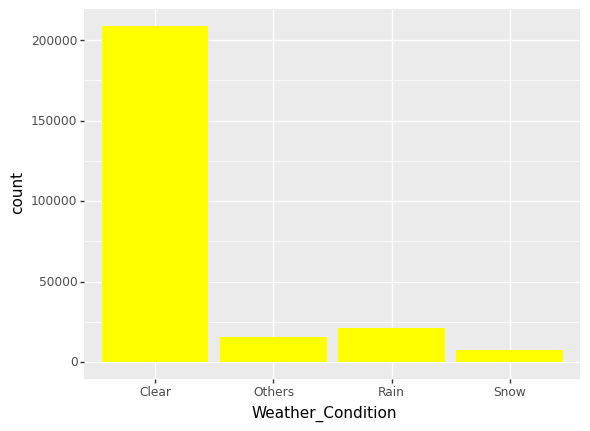

<ggplot: (8777847033917)>

In [19]:
ggplot(accident_df) + geom_bar(aes(x='Weather_Condition'),fill="yellow")

### Barplot of Sunrise_Sunset

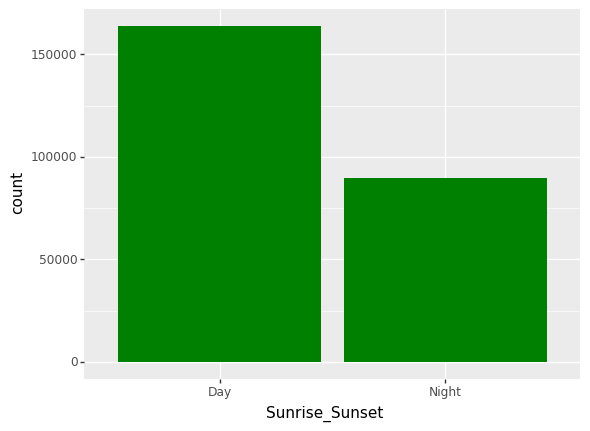

<ggplot: (8777824029407)>

In [20]:
ggplot(accident_df) + geom_bar(aes(x='Sunrise_Sunset'),fill="green")

#### Replacing values in Wind_Direction columns

In [21]:
# Unique values in column "Wind_Direction"
print(accident_df['Wind_Direction'].unique())

['ENE' 'SSW' 'W' 'SSE' 'CALM' 'NNW' 'NNE' 'S' 'E' 'WSW' 'NE' 'WNW' 'SW'
 'SE' 'ESE' 'N' 'North' 'East' 'South' 'NW' 'VAR' 'Variable' 'West']


In [22]:
# Replacing Wind_Direction values
accident_df['Wind_Direction'] = accident_df['Wind_Direction'].replace(['N','North','NNW','NNE'], 'N')
accident_df['Wind_Direction'] = accident_df['Wind_Direction'].replace(['S','South','SSE','SSW'], 'S')
accident_df['Wind_Direction'] = accident_df['Wind_Direction'].replace(['E','East','ESE','ENE'], 'E')
accident_df['Wind_Direction'] = accident_df['Wind_Direction'].replace(['W','West','WNW','WSW'], 'W')
accident_df['Wind_Direction'] = accident_df['Wind_Direction'].replace(['VAR','Variable'], 'var')
accident_df.head(15)

Severity           Start_Time Side       County    Weather_Timestamp  \
2810728    Major  2019-06-23 23:14:09    L        Butte  2019-06-23 22:53:00   
2209389    Major  2020-03-20 17:49:32    R      Suffolk  2020-03-20 17:56:00   
2218144    Major  2020-03-24 19:00:25    R     Davidson  2020-03-24 18:53:00   
2792571    Major  2019-05-16 16:18:00    R        Adams  2019-05-16 15:58:00   
832345     Major  2021-10-15 15:56:30    R      Daviess  2021-10-15 15:56:00   
2168993    Major  2020-06-12 07:58:50    R       DuPage  2020-06-12 07:51:00   
2110750    Major  2020-05-11 10:56:33    R      Broward  2020-05-11 10:53:00   
1325409    Major  2021-12-21 11:28:00    R          Elk  2021-12-21 11:53:00   
2117061    Major  2020-05-14 09:36:42    R      Tarrant  2020-05-14 09:53:00   
2202448    Major  2020-03-16 17:24:32    R       Marion  2020-03-16 17:53:00   
2233561    Major  2020-04-02 06:05:47    R       Dallas  2020-04-02 06:20:00   
1796366    Major  2020-09-30 20:39:00    R      Madison  2020-09-30 20:53:00   
2309746    Major  2020-01-21 19:04:48    R         Cook  2020-01-21 18:52:00   
2831155    Major  2019-07-24 08:15:32    R  St. Charles  2019-07-24 07:54:00   
2086967    Major  2020-06-02 16:35:21    R       Dallas  2020-06-02 16:53:00   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
2810728            82.0           82.0         38.0         29.65   
2209389            59.0           59.0         81.0         29.68   
2218144            61.0           61.0         90.0         29.10   
2792571            75.0           75.0         25.0         24.20   
832345             79.0           79.0         62.0         29.39   
2168993            69.0           69.0         49.0         29.53   
2110750            80.0           80.0         76.0         30.01   
1325409            33.0           27.0         66.0         27.71   
2117061            76.0           76.0         76.0         29.25   
2202448            59.0           59.0         32.0         29.81   
2233561            59.0           59.0         77.0         29.22   
1796366            64.0           64.0         63.0         29.50   
2309746            24.0           15.0         77.0         29.58   
2831155            69.0           69.0         84.0         29.69   
2086967            87.0           87.0         46.0         29.26   

         Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
2810728            10.0              E              9.0               0.00   
2209389            10.0              S             15.0               0.00   
2218144            10.0              W              3.0               0.06   
2792571            10.0              S             10.0               0.00   
832345             10.0              W              8.0               0.00   
2168993            10.0           CALM              0.0               0.00   
2110750            10.0              N              9.0               0.00   
1325409            10.0              S              7.0               0.00   
2117061            10.0              S             20.0               0.00   
2202448            10.0              N             15.0               0.00   
2233561            10.0              S             14.0               0.00   
1796366            10.0              S              9.0               0.00   
2309746            10.0              S              8.0               0.00   
2831155            10.0           CALM              0.0               0.00   
2086967            10.0              S             13.0               0.00   

        Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
2810728             Clear    False  False     False     False     False   
2209389             Clear    False  False      True     False     False   
2218144             Clear    False  False     False     False     False   
2792571             Clear    False  False     False     False     False  

In [23]:
# Excluding 'var' values from Wind_Direction
accidentdf = accident_df.loc[(accident_df['Wind_Direction'] != 'var')]

### Barplot of Wind_Direction

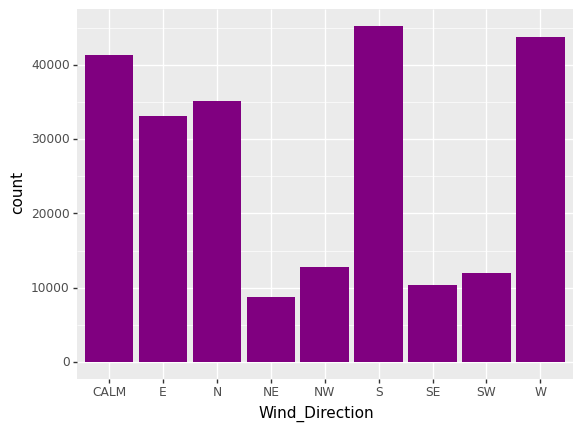

<ggplot: (8777840516699)>

In [24]:
#Wind Direction
ggplot(accidentdf) + geom_bar(aes(x='Wind_Direction'),fill="purple")

### Barplot of Side

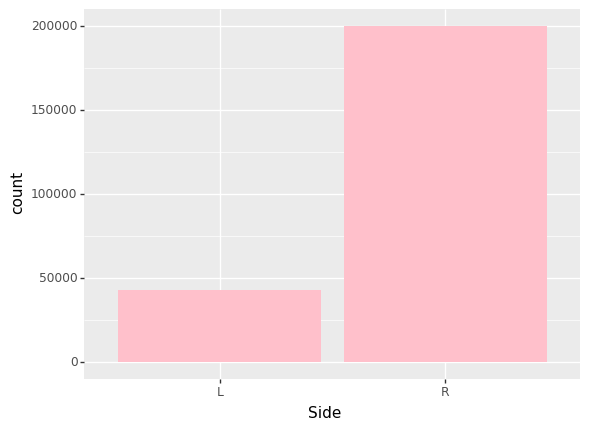

<ggplot: (8777841296728)>

In [25]:
ggplot(accidentdf) + geom_bar(aes(x='Side'),fill="pink")

Analysis of Bar charts:
- It is unexpected for most cases like for weather condition, most accidents happen even when the weather conditions are good and clear 
- More accidents happen during the day even though we expected that more accidents would happen at night when drivers vision may not be clear
- There are as many accidents happening when the there is no wind direction as when there is wind direction but we will continue to explore more
- It is expected for majority of the accidents to happen on the right lane as in the US, merging lane is tricky, it’s common for people to be focused on making their exit that they forget to look for other cars around them.

### Start_Time Analysis

In [26]:
#Check column values of Start_Time
accidentdf.Start_Time

2810728    2019-06-23 23:14:09
2209389    2020-03-20 17:49:32
2218144    2020-03-24 19:00:25
2792571    2019-05-16 16:18:00
832345     2021-10-15 15:56:30
                  ...         
1971521    2020-11-04 02:04:00
473304     2021-03-04 01:48:30
2818496    2019-08-29 15:55:00
1574963    2021-02-10 00:08:00
2211375    2020-03-20 16:11:00
Name: Start_Time, Length: 242480, dtype: object

In [27]:
#Extracting Time from Start_Time
accidentdf.Start_Time = pd.to_datetime(accidentdf.Start_Time)

/var/folders/6z/84yjcf7x7pl5b8ltxz93scj40000gn/T/ipykernel_13127/3809825188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Histogram for Distribution of Start_Time

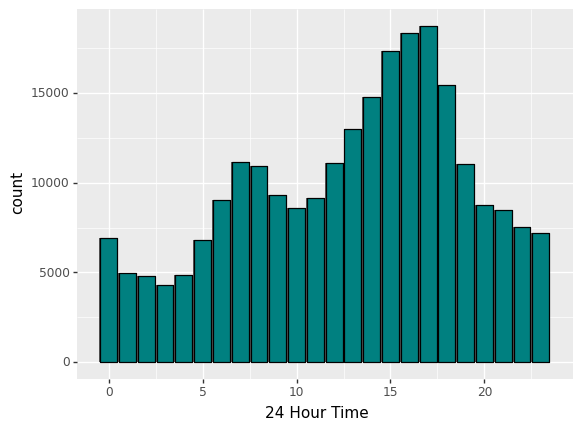

<ggplot: (8777796815095)>

In [28]:
ggplot(accidentdf) + aes(x=accidentdf.Start_Time.dt.hour) + stat_bin(bins=24) + geom_bar(color="black" ,fill="teal") + labs(x="24 Hour Time")

#### Analysis: There are more accidents happening during the rush hours (Morning and Late Afternoon). This could be because there is a larger number of people travelling to office or home. 

## Accident Trend Analysis

In [29]:
#Extracting Year from Start_Time
accidentdf['Year'] = pd.DatetimeIndex(accidentdf['Start_Time']).year

/var/folders/6z/84yjcf7x7pl5b8ltxz93scj40000gn/T/ipykernel_13127/1934546836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
#Group the count by 'Year'
count = accidentdf.groupby(accidentdf.Year)['Year'].count().reset_index(name = 'Count')
count

Year   Count
0  2016    1331
1  2017    2931
2  2018    3343
3  2019   44476
4  2020   88536
5  2021  101863

### Line chart of Accident Trend from 2016-2021

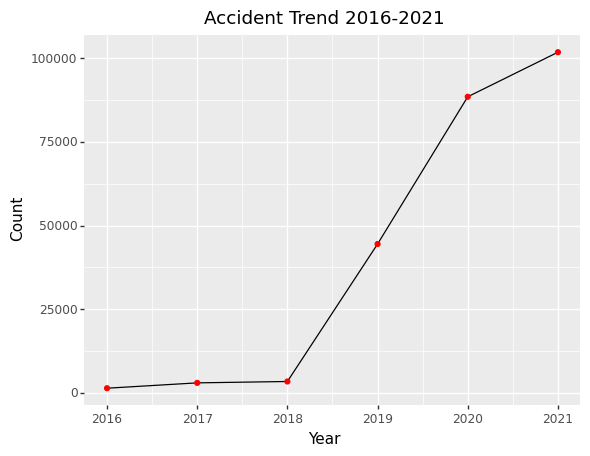

<ggplot: (8777772879936)>

In [31]:
ggplot(aes(x=count['Year'], y=count['Count']))  + geom_line() + geom_point(color = "red")+ labs(title='Accident Trend 2016-2021')

## Correlation (Categorical)

We will be using Cramer’s V to test relations with our categorical variables. It is based on a nominal variation of Pearson’s Chi-Square Test.

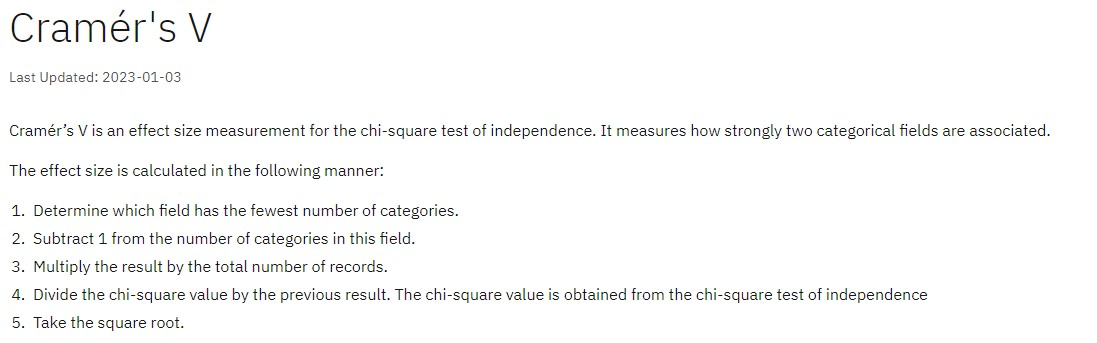

#### The categorical variables that my group would like to test are the following:

1) Side

2) Wind_Direction

3) Weather_Condition

4) Sunrise_Sunset

5) Civil_Twilight

6) Nautical_Twilight

7) Astronomical_Twilight

In [32]:
#Extracting Categorical Variables
df_cat = pd.DataFrame(data = accidentdf.dtypes, columns = ['Data Type']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['Data Type'] == 'object'])
cat_var

['Severity',
 'Side',
 'County',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [33]:
#Creating a DataFrame with all categorical variables
accident_cat = accidentdf[cat_var]
accident_cat.head(10)

Severity Side    County    Weather_Timestamp Wind_Direction  \
2810728    Major    L     Butte  2019-06-23 22:53:00              E   
2209389    Major    R   Suffolk  2020-03-20 17:56:00              S   
2218144    Major    R  Davidson  2020-03-24 18:53:00              W   
2792571    Major    R     Adams  2019-05-16 15:58:00              S   
832345     Major    R   Daviess  2021-10-15 15:56:00              W   
2168993    Major    R    DuPage  2020-06-12 07:51:00           CALM   
2110750    Major    R   Broward  2020-05-11 10:53:00              N   
1325409    Major    R       Elk  2021-12-21 11:53:00              S   
2117061    Major    R   Tarrant  2020-05-14 09:53:00              S   
2202448    Major    R    Marion  2020-03-16 17:53:00              N   

        Weather_Condition Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
2810728             Clear          Night          Night             Night   
2209389             Clear            Day            Day               Day   
2218144             Clear            Day            Day               Day   
2792571             Clear            Day            Day               Day   
832345              Clear            Day            Day               Day   
2168993             Clear            Day            Day               Day   
2110750             Clear            Day            Day               Day   
1325409             Clear            Day            Day               Day   
2117061             Clear            Day            Day               Day   
2202448             Clear            Day            Day               Day   

        Astronomical_Twilight  
2810728                 Night  
2209389                   Day  
2218144                   Day  
2792571                   Day  
832345                    Day  
2168993                   Day  
2110750                   Day  
1325409                   Day  
2117061                   Day  
2202448                   Day

In [34]:
#Function for Categorical Correlation(Chi-squared)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [35]:
# Correlation between the categorical variables 
sv_s = cramers_v(accident_cat['Severity'], accident_cat['Side'])
sv_wd = cramers_v(accident_cat['Severity'], accident_cat['Wind_Direction'])
sv_wc = cramers_v(accident_cat['Severity'], accident_cat['Weather_Condition'])

In [36]:
# Correlation between the categorical variables
sv_ss = cramers_v(accident_cat['Severity'], accident_cat['Sunrise_Sunset'])
sv_ct = cramers_v(accident_cat['Severity'], accident_cat['Civil_Twilight'])
sv_nt = cramers_v(accident_cat['Severity'], accident_cat['Nautical_Twilight'])
sv_at = cramers_v(accident_cat['Severity'], accident_cat['Astronomical_Twilight'])

In [37]:
print(sv_s, sv_wd, sv_wc, sv_ss, sv_ct, sv_nt, sv_at)

0.04107330809672212 0.07054244584554936 0.08363864149863705 0.059335397443308624 0.05833664385670428 0.0508809683478556 0.047800748196111464


In [38]:
#Create a table with correlations of Categorical variables
from tabulate import tabulate 
data = [["Side", sv_s], 
        ["Wind_Direction", sv_wd], ["Weather_Condition", sv_wc], 
        ["Sunrise_Sunset", sv_ss], ["Civil_Twilight", sv_ct], 
        ["Nautical_Twilight", sv_nt], ["Astronomical_Twilight", sv_at]]
  
#define header names
col_names = ["Severity &", "Correlation"]
  
#display table
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════╤═══════════════╕
│ Severity &            │   Correlation │
╞═══════════════════════╪═══════════════╡
│ Side                  │     0.0410733 │
├───────────────────────┼───────────────┤
│ Wind_Direction        │     0.0705424 │
├───────────────────────┼───────────────┤
│ Weather_Condition     │     0.0836386 │
├───────────────────────┼───────────────┤
│ Sunrise_Sunset        │     0.0593354 │
├───────────────────────┼───────────────┤
│ Civil_Twilight        │     0.0583366 │
├───────────────────────┼───────────────┤
│ Nautical_Twilight     │     0.050881  │
├───────────────────────┼───────────────┤
│ Astronomical_Twilight │     0.0478007 │
╘═══════════════════════╧═══════════════╛


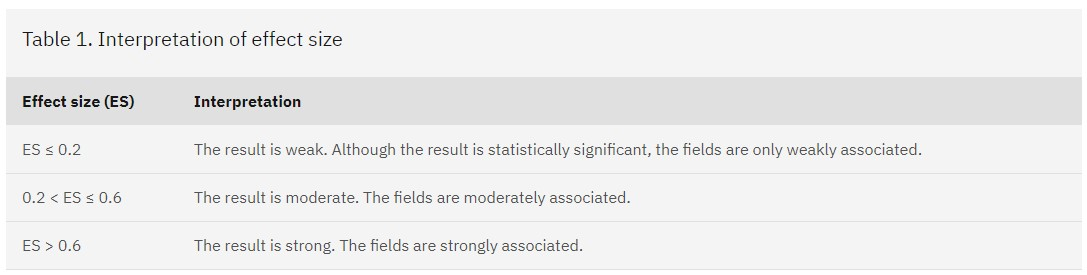

The image shows how we can interpret the correlation values and we can see that all variables have very weak correlations here and thus we will be moving on to explore numerical correlation instead.

## Correlation (Numerical)

### The **Point-Biserial Correlation** is a special case of the Pearson Correlation and is used when you want to measure the relationship between a continuous variable and a dichotomous variable, or one that has two values. In this case, the dichotomous variable is **"Severity"** which has only two values: "Major" and "Minor".

#### The following points are the necessary assumptions for a Point-Biserial Correlation.

1) No outliers (continuous variable) - assessed through a visual examination of the scatterplot

2) Approximately normally distributed (continuous variable)

3) Homogeneity of variance of the continuous variable between both groups of the dichotomous variable - assessed through Levene's Test

#### The continuous variables that my group would like to test are the following:

1) Temperature(F)

2) Wind_Chill(F)

3) Humidity(%)

4) Pressure(in)

5) Visibility(mi)

6) Wind_Speed(mph)

7) Precipitation(in)

# Temperature(F)

### Scatterplot of Temperature(F)

<AxesSubplot:>

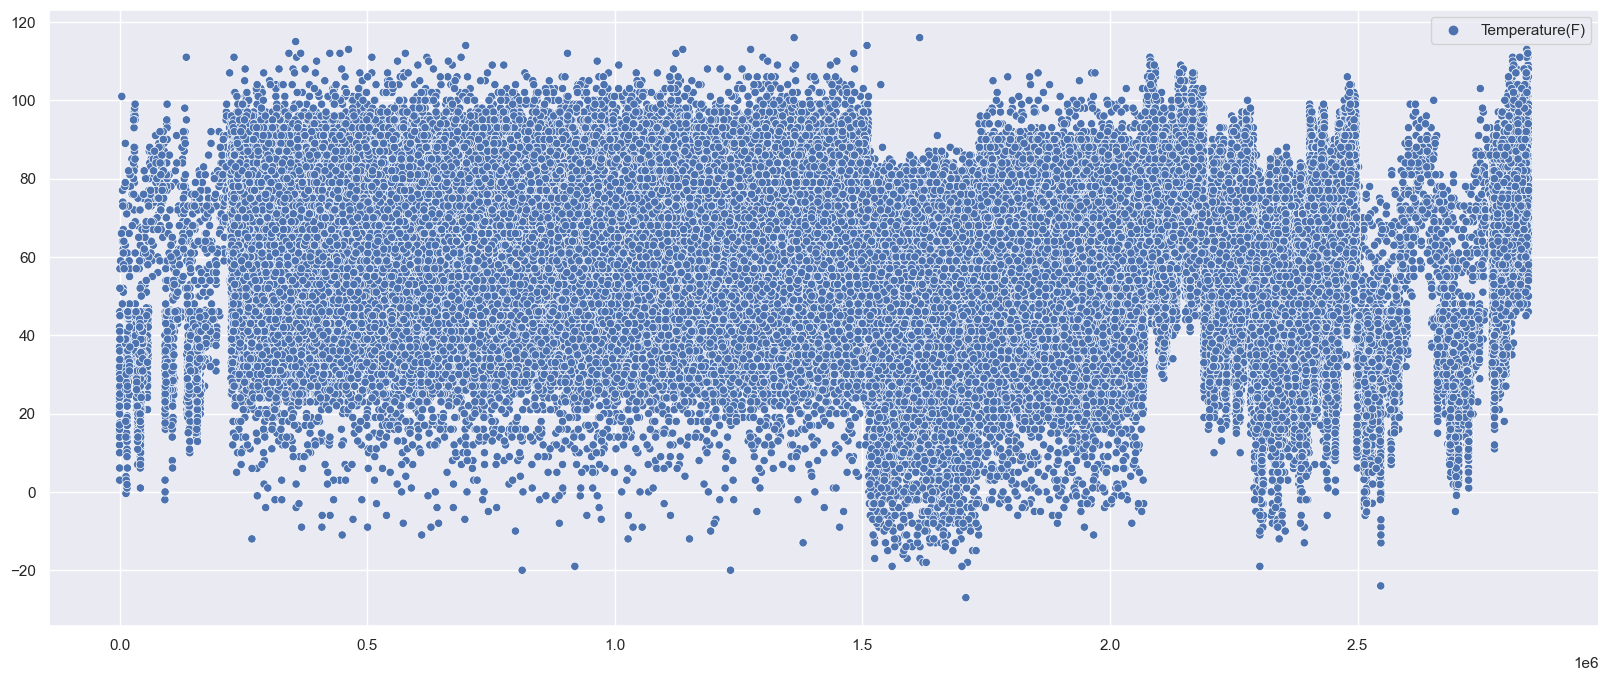

In [39]:
Temperature = pd.DataFrame(accidentdf["Temperature(F)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Temperature)

In [40]:
#Summary of Temperature(F)
Temperature_Summary = pd.DataFrame(Temperature.describe())
Temperature_Summary.head(8)

Temperature(F)
count   242480.000000
mean        60.892203
std         18.816079
min        -27.000000
25%         48.000000
50%         63.000000
75%         76.000000
max        116.000000

In [41]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Temperature_Summary.iloc[6]) - float(Temperature_Summary.iloc[4])
upper_limit = float(Temperature_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Temperature_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Temperature(F)"}, inplace = True)

Extra_Info

Temperature(F)
IQR                      28.0
lower_outlier             6.0
upper_outlier           118.0

In [42]:
#Count number of outliers in Temperature(F)
Outlier_Count = 0

for column in Temperature:
    #Convert values in Temperature into a list
    list = Temperature[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 118.0 or i < 6.0:
            Outlier_Count += 1

print(Outlier_Count)

857


### Since there are only 857 outliers which only represent 0.353%(3s.f) of the total count of 242,480, we can safely remove these outliers without losing too much data.

In [43]:
#Create a dataframe for "Severity" and "Temperature(F)"
Joint_DF_1 = pd.DataFrame(accidentdf[["Severity","Temperature(F)"]])
for ind, row in Joint_DF_1.iterrows():
    if  row["Temperature(F)"] < 6.0 or row["Temperature(F)"] > 118.0:
        Joint_DF_1 = Joint_DF_1.drop(index = ind)
Joint_DF_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241623 entries, 2810728 to 2211375
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Severity        241623 non-null  object 
 1   Temperature(F)  241623 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


### Histogram for Temperature(F)

<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

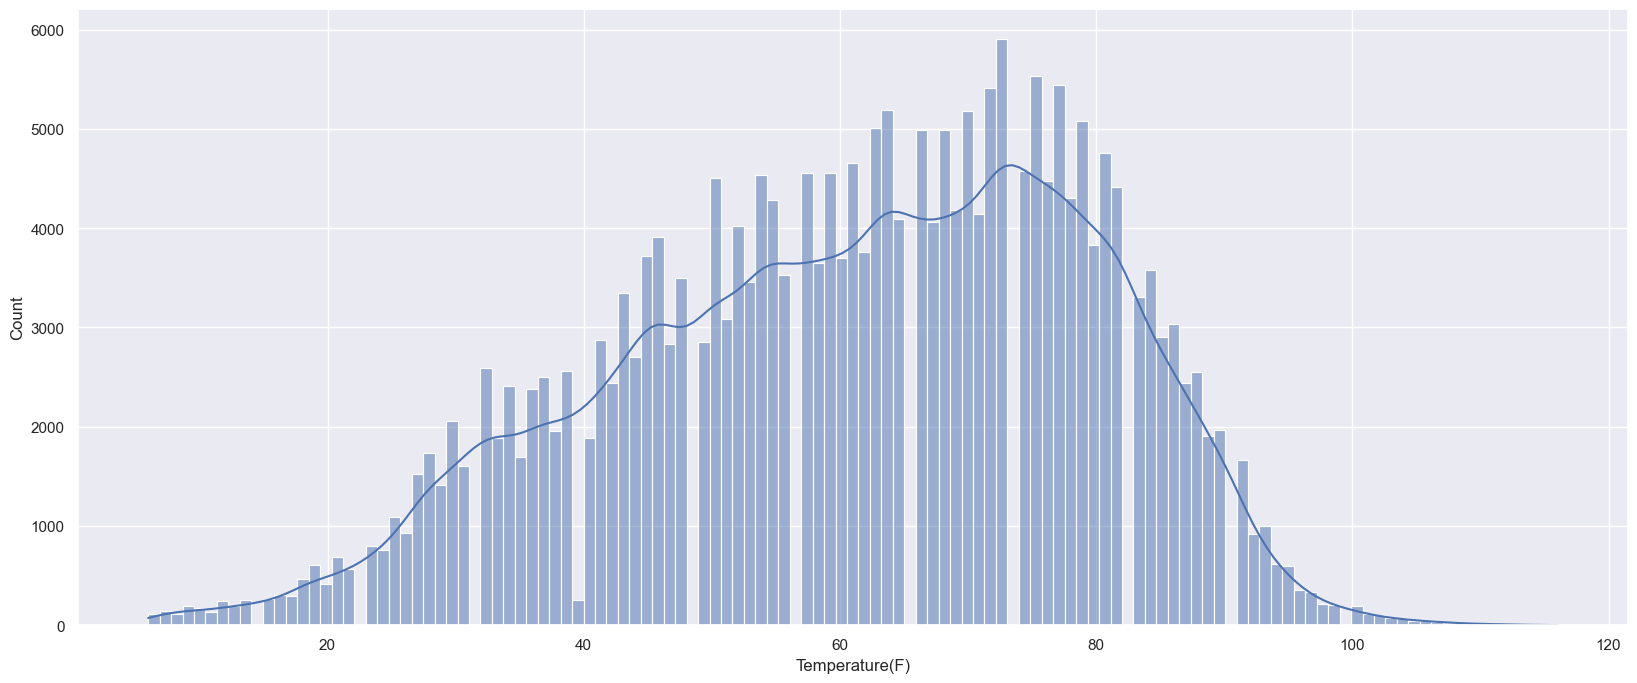

In [44]:
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_1["Temperature(F)"], kde = True)

In [45]:
stat, p = levene(Joint_DF_1.loc[Joint_DF_1['Severity'] == 'Major']["Temperature(F)"],Joint_DF_1.loc[Joint_DF_1['Severity'] == 'Minor']["Temperature(F)"])
p

6.61223970690618e-91

## Wind_Chill(F)

### Scatterplot of Wind_Chill(F)

<AxesSubplot:>

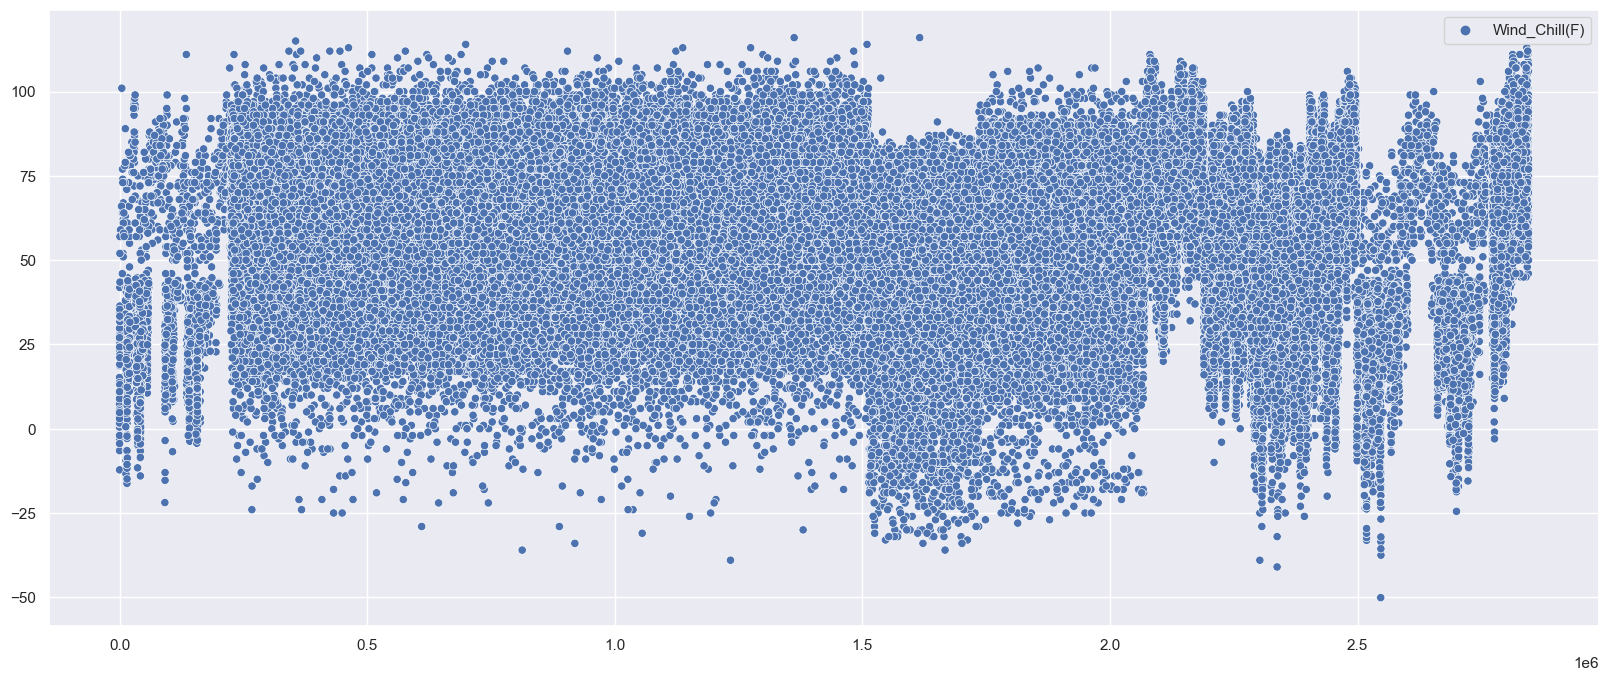

In [46]:
Wind_Chill = pd.DataFrame(accidentdf["Wind_Chill(F)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Wind_Chill)

In [47]:
#Summary of Wind_Chill(F)
Wind_Chill_Summary = pd.DataFrame(Wind_Chill.describe())
Wind_Chill_Summary.head(8)

Wind_Chill(F)
count  242480.000000
mean       59.490572
std        21.096128
min       -50.100000
25%        45.000000
50%        63.000000
75%        76.000000
max       116.000000

In [48]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Wind_Chill_Summary.iloc[6]) - float(Wind_Chill_Summary.iloc[4])
upper_limit = float(Wind_Chill_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Wind_Chill_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Wind_Chill(F)"}, inplace = True)

Extra_Info

Wind_Chill(F)
IQR                     31.0
lower_outlier           -1.5
upper_outlier          122.5

In [98]:
#Number of Outliers
Outlier_Count = 0

for column in Wind_Chill:
    #Convert values in Wind_Chill into a list
    list = Wind_Chill[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 122.5 or i < -1.5:
            Outlier_Count += 1

print(Outlier_Count)

1611
[CV 2/5] END ........................solver=sag;, score=0.539 total time=   1.1s
[CV 4/5] END .......................solver=saga;, score=0.545 total time=   0.7s
[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.549 total time=   4.6s
[CV 4/5] END .....max_depth=5, n_estimators=200;, score=0.554 total time=  10.8s
[CV 2/5] END .....max_depth=10, n_estimators=50;, score=0.556 total time=   4.7s
[CV 5/5] END .....max_depth=10, n_estimators=50;, score=0.554 total time=   4.9s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.556 total time=   8.1s
[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.556 total time=  14.6s
[CV 5/5] END ....max_depth=10, n_estimators=500;, score=0.554 total time=  35.5s
[CV 3/5] END ....max_depth=15, n_estimators=500;, score=0.552 total time=  41.3s
[CV 1/5] END ....max_depth=30, n_estimators=500;, score=0.553 total time=  34.3s
[CV 3/5] END ........................solver=sag;, score=0.538 total time=   1.2s
[CV 4/5] END ......max_

### Since there are only 1,611 outliers which only represent 0.664%(3s.f) of the total count of 242,480, we can safely remove these outliers without losing too much data.

In [99]:
#Create a dataframe for "Severity" and "Wind_Chill(F)"
Joint_DF_2 = pd.DataFrame(accidentdf[["Severity","Wind_Chill(F)"]])
for ind, row in Joint_DF_2.iterrows():
    if  row["Wind_Chill(F)"] < -1.5 or row["Wind_Chill(F)"] > 122.5:
        Joint_DF_2 = Joint_DF_2.drop(index = ind)
Joint_DF_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242480 entries, 2810728 to 2211375
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Severity       242480 non-null  object 
 1   Wind_Chill(F)  242480 non-null  float64
dtypes: float64(1), object(1)
memory usage: 13.6+ MB


### Combination Chart of Wind_Chill(F)

<AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Count'>

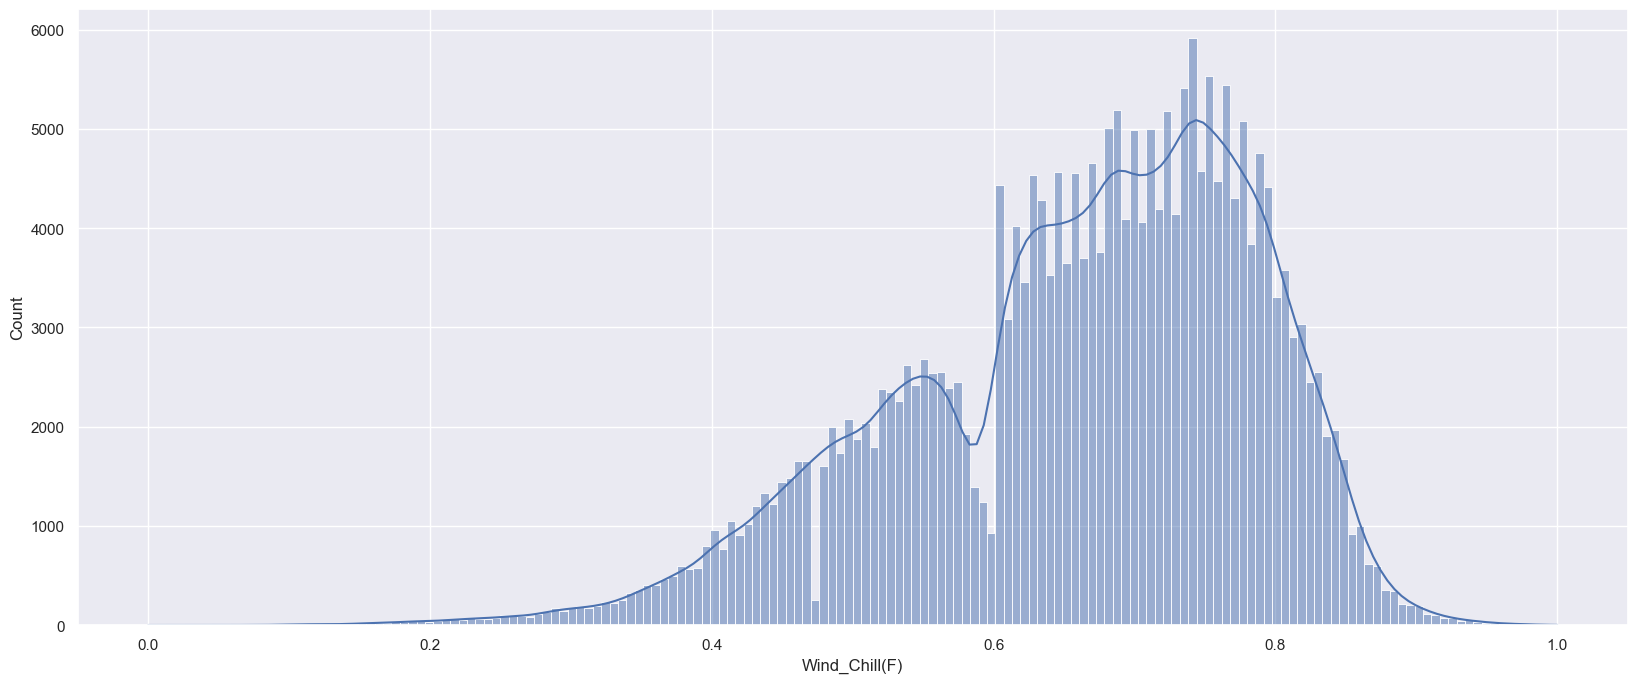

In [100]:
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_2["Wind_Chill(F)"], kde = True)

In [101]:
stat, p = levene(Joint_DF_2.loc[Joint_DF_2['Severity'] == 'Major']["Wind_Chill(F)"],Joint_DF_2.loc[Joint_DF_2['Severity'] == 'Minor']["Wind_Chill(F)"])
p

1.1336302431377872e-125

## Humidity(%)

### Scatterplot of Humidity

<AxesSubplot:>

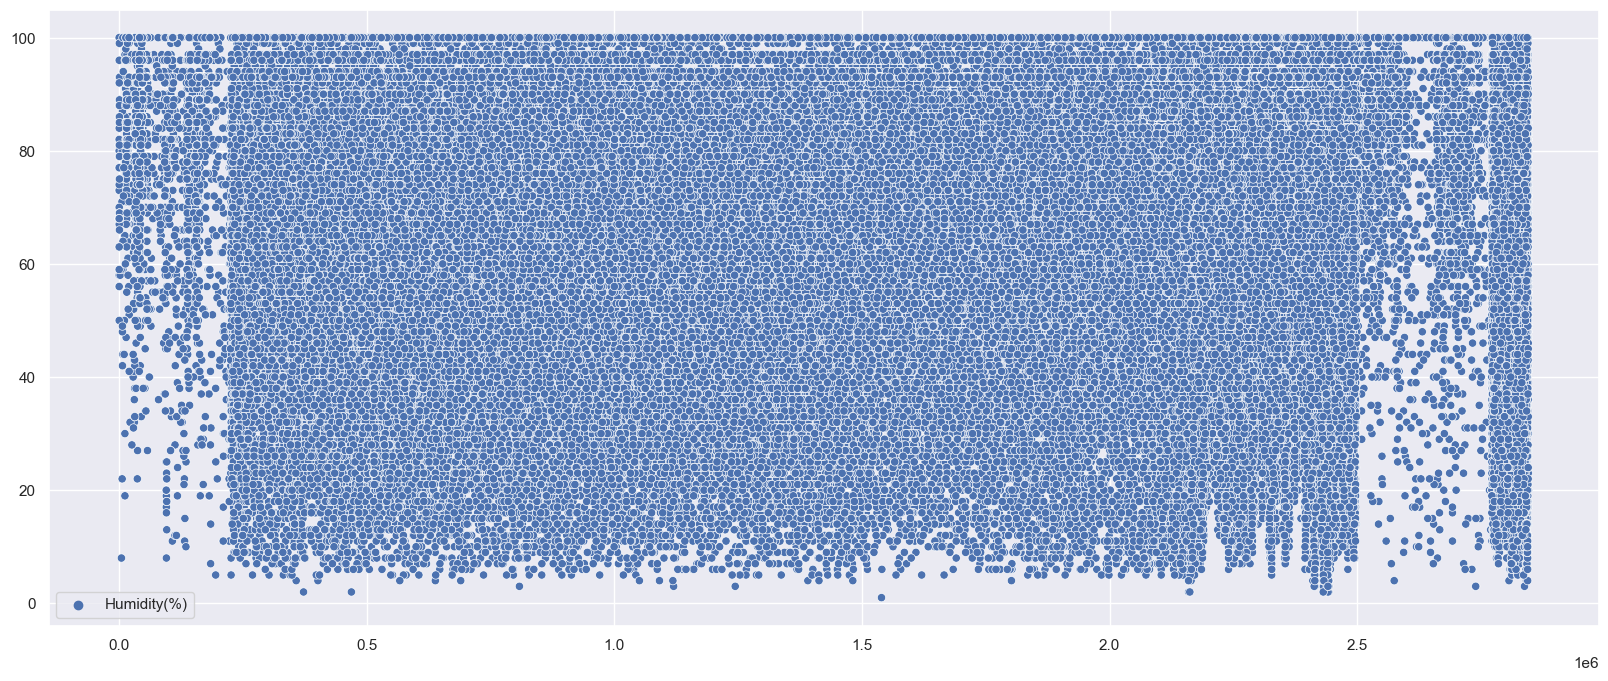

In [53]:
Humidity = pd.DataFrame(accidentdf["Humidity(%)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Humidity)

In [54]:
#Summary of "Humidity(%)"
Humidity_Summary = pd.DataFrame(Humidity.describe())
Humidity_Summary.head(8)

Humidity(%)
count  242480.000000
mean       65.581982
std        22.627215
min         1.000000
25%        49.000000
50%        68.000000
75%        85.000000
max       100.000000

In [55]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Humidity_Summary.iloc[6]) - float(Humidity_Summary.iloc[4])
upper_limit = float(Humidity_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Humidity_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Humidity(%)"}, inplace = True)

Extra_Info

Humidity(%)
IQR                   36.0
lower_outlier         -5.0
upper_outlier        139.0

Since lower_outlier is less than the min value of 1 and the upper_outlier higher than the max value of 100, this means that there are no outliers.

### Combination chart of Humidity(%)

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

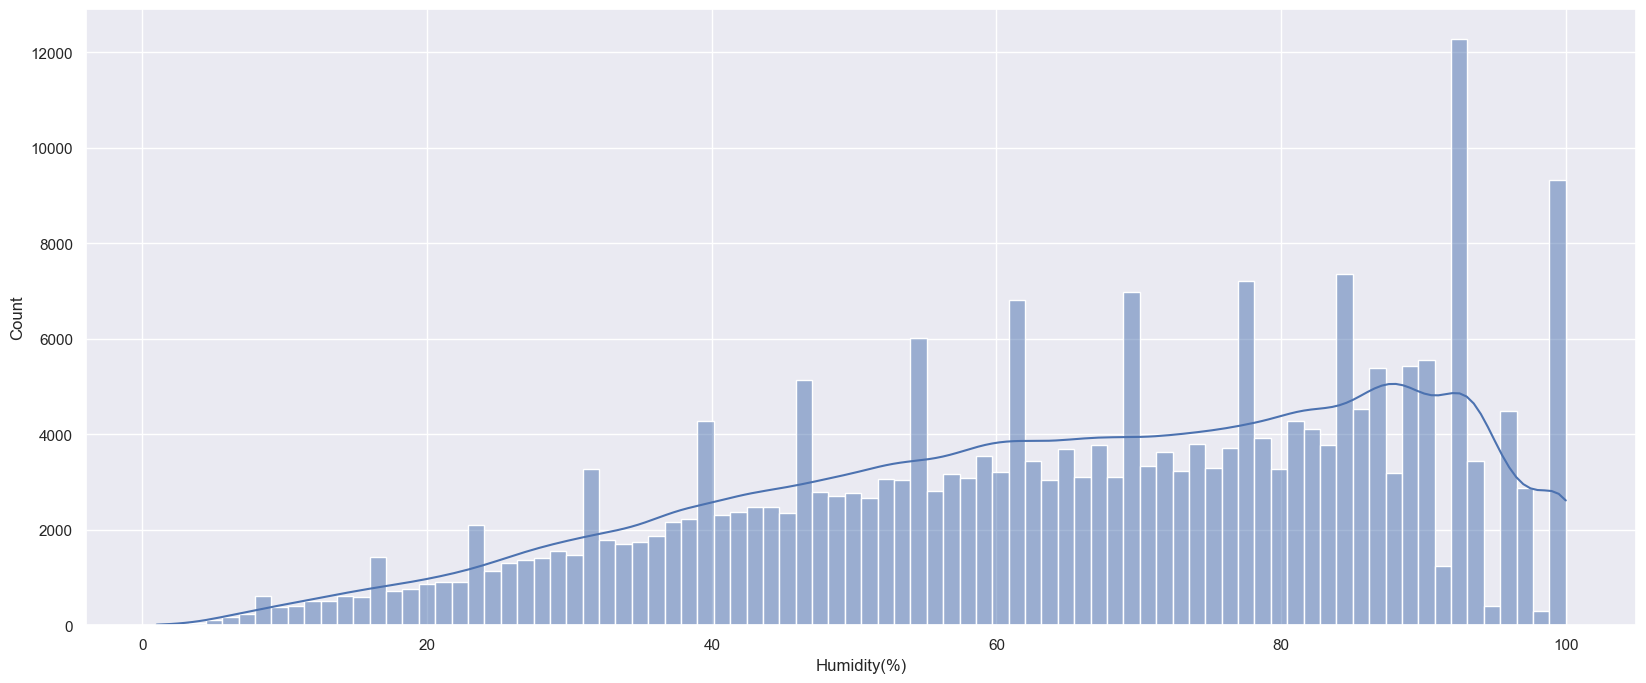

In [56]:
#Create a dataframe for "Severity" and "Humidity(%)"
Joint_DF_3 = pd.DataFrame(accidentdf[["Severity","Humidity(%)"]])
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_3["Humidity(%)"], kde = True)

In [57]:
stat, p = levene(Joint_DF_3.loc[Joint_DF_3['Severity'] == 'Major']["Humidity(%)"],Joint_DF_3.loc[Joint_DF_3['Severity'] == 'Minor']["Humidity(%)"], center = "mean")
p

1.9691743097382056e-23

## Pressure(in)

### Scatterplot of Pressure(in)

<AxesSubplot:>

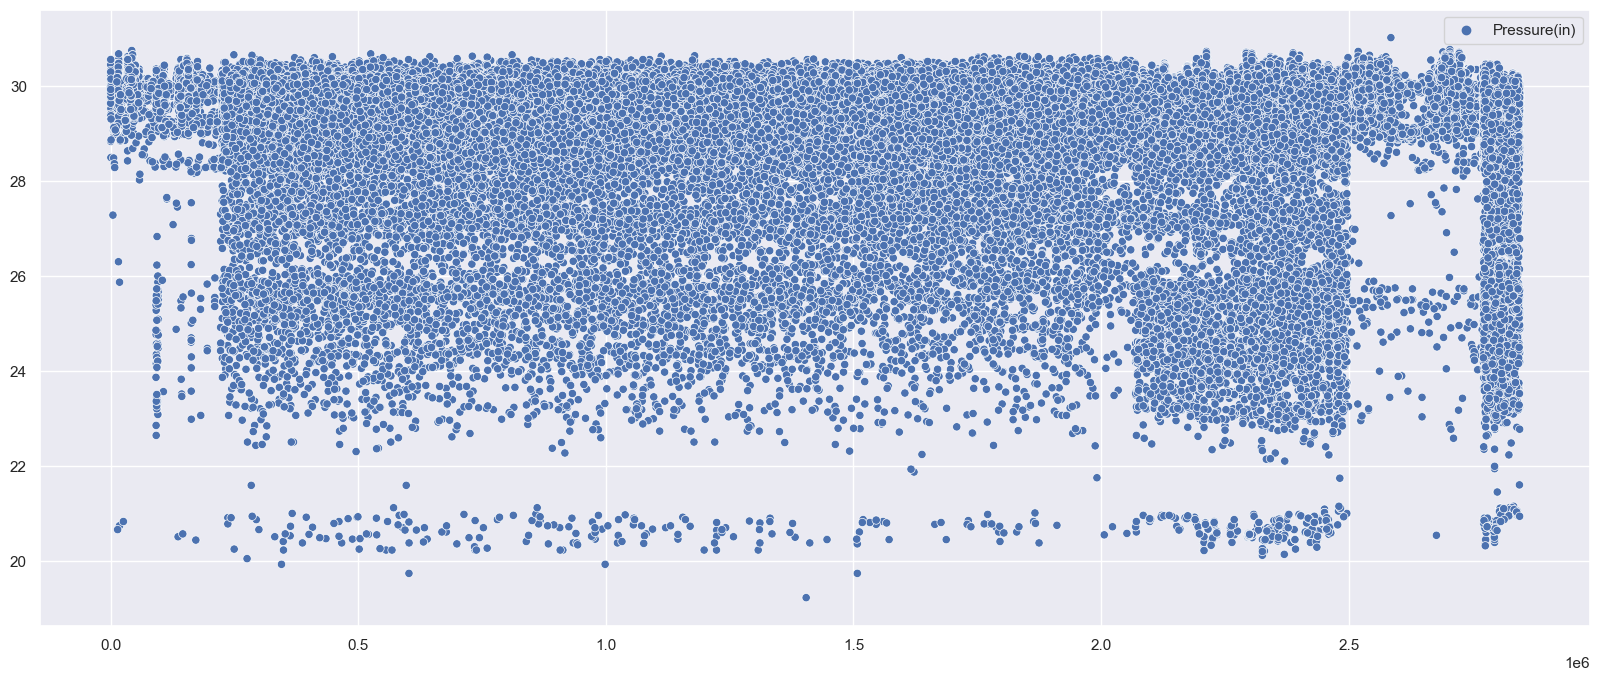

In [58]:
Pressure = pd.DataFrame(accidentdf["Pressure(in)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Pressure)

In [59]:
#Summary of "Pressure(in)"
Pressure_Summary = pd.DataFrame(Pressure.describe())
Pressure_Summary.head(8)

Pressure(in)
count  242480.000000
mean       29.243450
std         1.317126
min        19.240000
25%        29.130000
50%        29.640000
75%        29.940000
max        31.010000

In [60]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Pressure_Summary.iloc[6]) - float(Pressure_Summary.iloc[4])
upper_limit = float(Pressure_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Pressure_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Pressure(in)"}, inplace = True)

Extra_Info

Pressure(in)
IQR                   0.810
lower_outlier        27.915
upper_outlier        31.155

In [61]:
#Number of outliers
Outlier_Count = 0

for column in Pressure:
    #Convert values in Pressure into a list
    list = Pressure[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 31.155 or i < 27.915:
            Outlier_Count += 1

print(Outlier_Count)

19843


### Since there are only 19,843 outliers which only represent 8.18%(3s.f) of the total count of 242,480, we can safely remove these outliers without losing too much data.

In [62]:
#Create a dataframe for "Severity" and "Pressure(in)"
Joint_DF_4 = pd.DataFrame(accidentdf[["Severity","Pressure(in)"]])
for ind, row in Joint_DF_4.iterrows():
    if  row["Pressure(in)"] < 27.915 or row["Pressure(in)"] > 31.155:
        Joint_DF_4 = Joint_DF_4.drop(index = ind)
Joint_DF_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222637 entries, 2810728 to 2211375
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Severity      222637 non-null  object 
 1   Pressure(in)  222637 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.1+ MB


### Combination chart of Pressure(in)

<AxesSubplot:xlabel='Pressure(in)', ylabel='Count'>

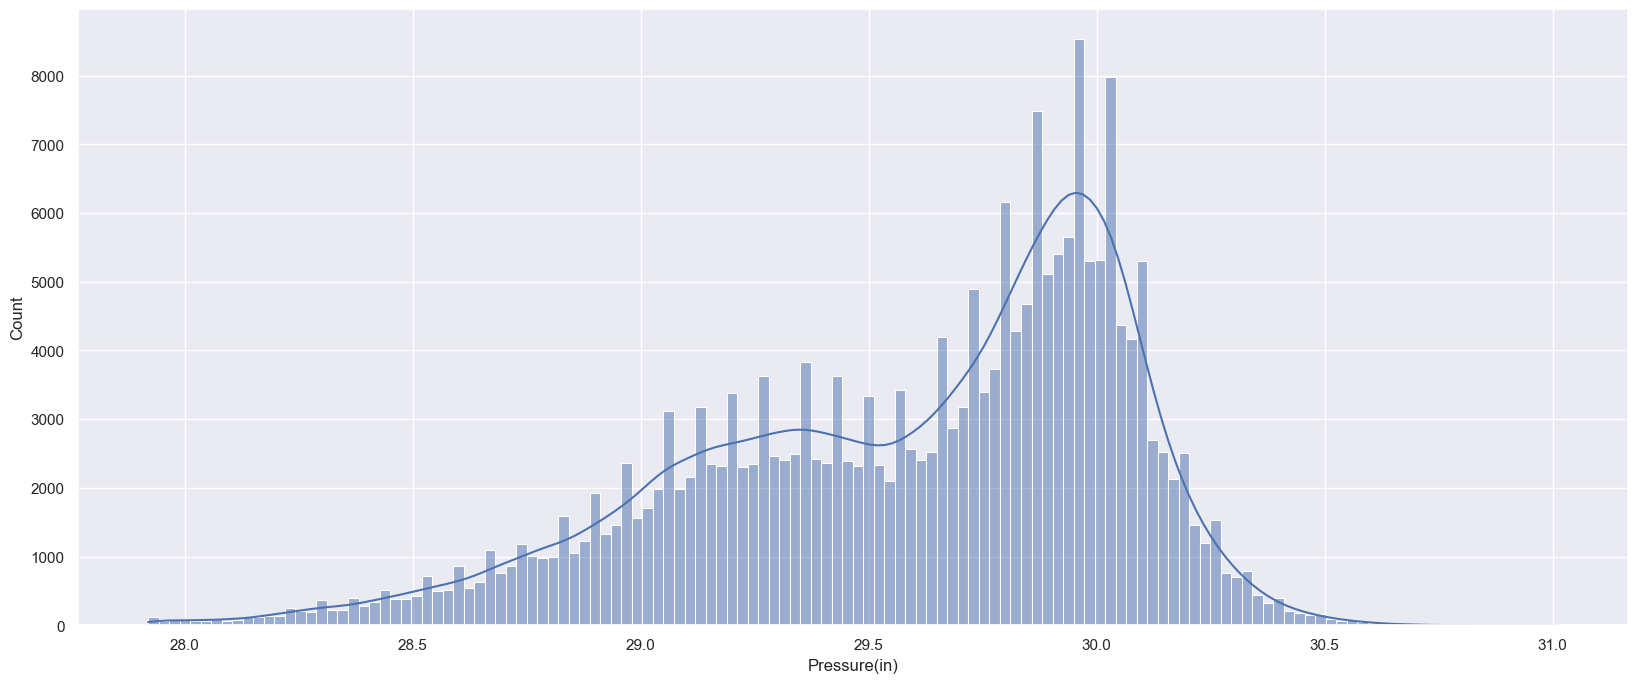

In [63]:
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_4["Pressure(in)"], kde = True)

In [64]:
stat, p = levene(Joint_DF_4.loc[Joint_DF_4['Severity'] == 'Major']["Pressure(in)"],Joint_DF_4.loc[Joint_DF_4['Severity'] == 'Minor']["Pressure(in)"], center = "mean")
p

3.455857478716419e-60

## Visibility(mi)

### Scatterplot of Visibility(mi)

<AxesSubplot:>

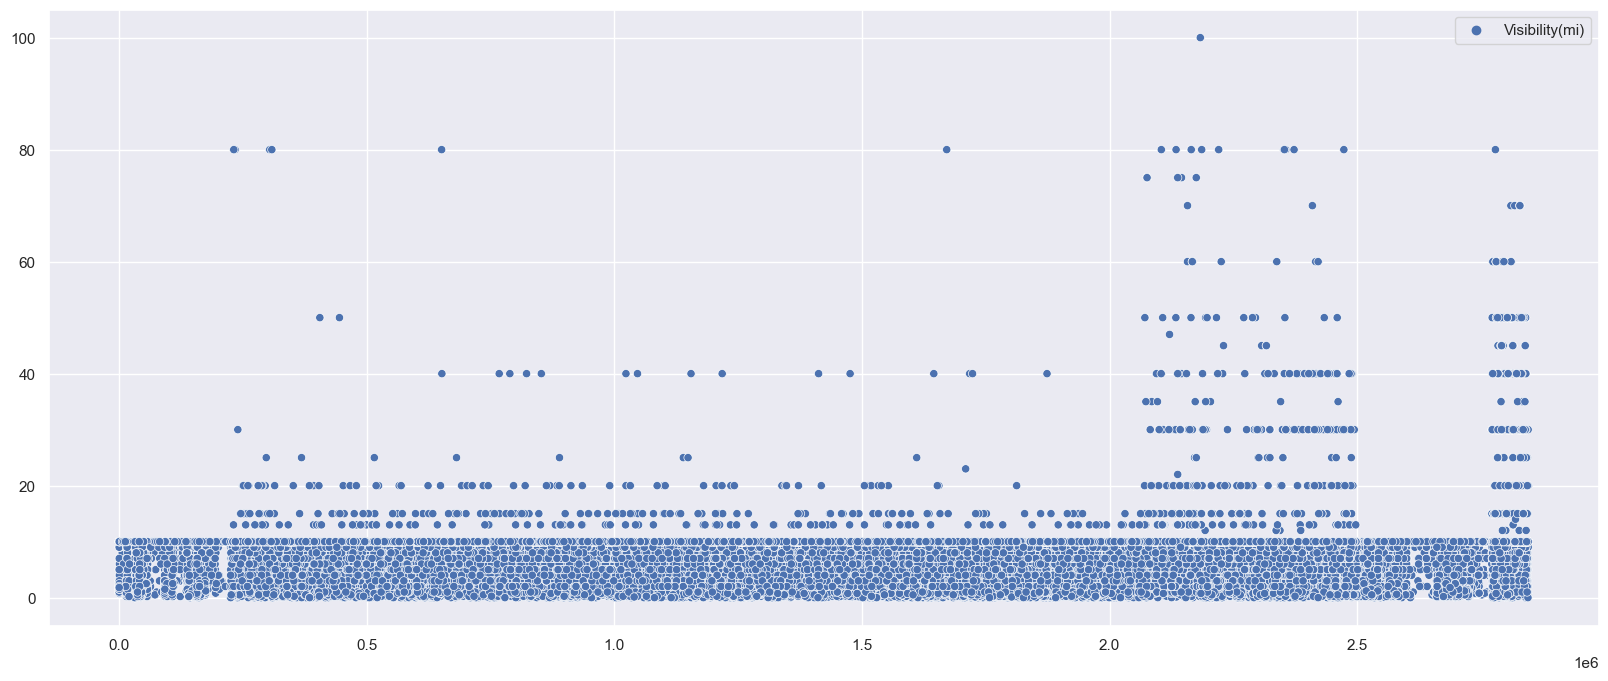

In [65]:
Visibility = pd.DataFrame(accidentdf["Visibility(mi)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Visibility)

In [66]:
#Summary of "Visibility(mi)"
Visibility_Summary = pd.DataFrame(Visibility.describe())
Visibility_Summary.head(8)

Visibility(mi)
count   242480.000000
mean         9.017826
std          3.050538
min          0.000000
25%         10.000000
50%         10.000000
75%         10.000000
max        100.000000

In [67]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Visibility_Summary.iloc[6]) - float(Visibility_Summary.iloc[4])
upper_limit = float(Visibility_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Visibility_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()


#Rename column
Extra_Info.rename(columns={0: "Visibility(mi)"}, inplace = True)

Extra_Info

Visibility(mi)
IQR                       0.0
lower_outlier            10.0
upper_outlier            10.0

In [68]:
#Number of Outliers
Outlier_Count = 0

for column in Visibility:
    #Convert values in Visibility into a list
    list = Visibility[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 10 or i < 10:
            Outlier_Count += 1

print(Outlier_Count)

51444


### Since there are  51,444 outliers which represent 21.2%(3s.f) of the total count of 242,480, we cannot safely remove these outliers without losing too much data.

## Wind_Speed(mph)

### Scatterplot of Wind_Speed(mph)

<AxesSubplot:>

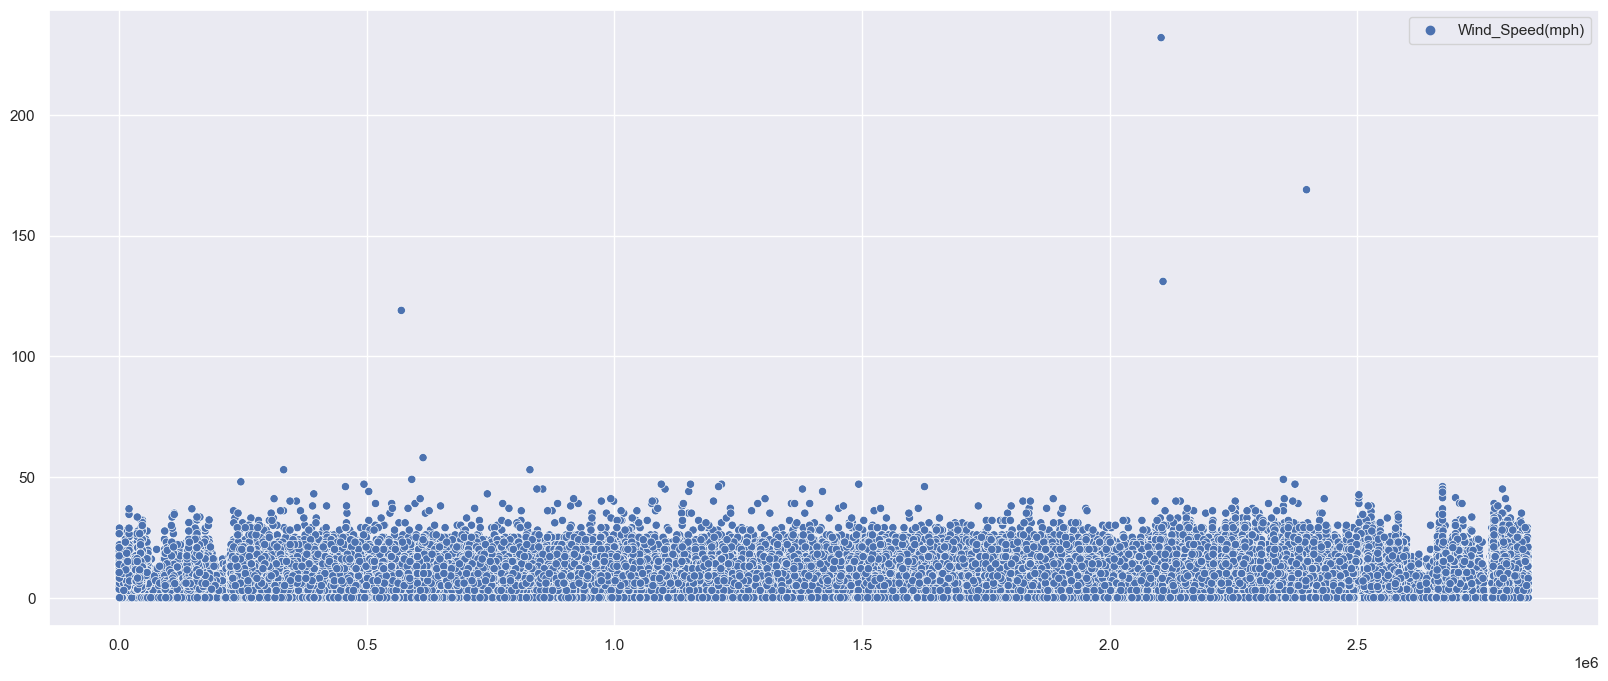

In [69]:
Wind_Speed = pd.DataFrame(accidentdf["Wind_Speed(mph)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Wind_Speed)

In [70]:
#Summary of Wind_Speed(mph)
Wind_Speed_Summary = pd.DataFrame(Wind_Speed.describe())
Wind_Speed_Summary.head(8)

Wind_Speed(mph)
count    242480.000000
mean          7.752686
std           5.667756
min           0.000000
25%           3.500000
50%           7.000000
75%          11.500000
max         232.000000

In [71]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Wind_Speed_Summary.iloc[6]) - float(Wind_Speed_Summary.iloc[4])
upper_limit = float(Wind_Speed_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Wind_Speed_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Wind_Speed(mph)"}, inplace = True)

Extra_Info

Wind_Speed(mph)
IQR                        8.0
lower_outlier             -8.5
upper_outlier             23.5

In [102]:
#Number of outliers
Outlier_Count = 0

for column in Wind_Speed:
    #Convert values in Wind_Speed into a list
    list = Wind_Speed[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 23.5 or i < -8.5:
            Outlier_Count += 1

print(Outlier_Count)

2319


### Since there are only 2,319 outliers which only represent 0.956%(3s.f) of the total count of 242,480, we can safely remove these outliers without losing too much data.

In [103]:
#Create a dataframe for "Severity" and "Wind_Speed(mph)"
Joint_DF_5 = pd.DataFrame(accident_df[["Severity","Wind_Speed(mph)"]])
for ind, row in Joint_DF_5.iterrows():
    if  row["Wind_Speed(mph)"] < -8.5 or row["Wind_Speed(mph)"] > 23.5:
        Joint_DF_5 = Joint_DF_5.drop(index = ind)
Joint_DF_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251069 entries, 2810728 to 2211375
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Severity         251069 non-null  object 
 1   Wind_Speed(mph)  251069 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.7+ MB


### Combination chart of Wind_Speed(mph)

<AxesSubplot:xlabel='Wind_Speed(mph)', ylabel='Count'>

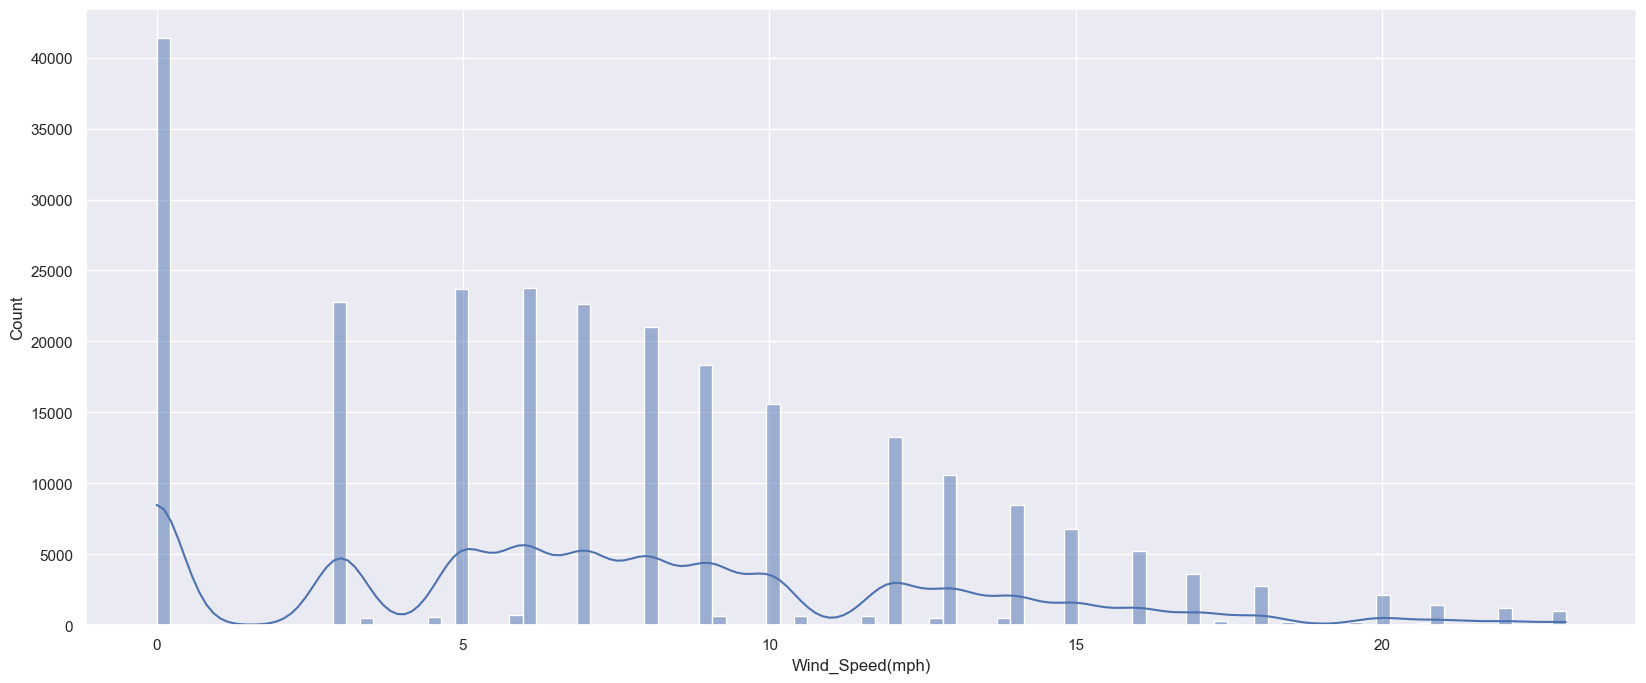

In [104]:
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_5["Wind_Speed(mph)"], kde = True)

In [116]:
stat, p = levene(Joint_DF_5.loc[Joint_DF_5['Severity'] == 'Major']["Wind_Speed(mph)"],Joint_DF_5.loc[Joint_DF_5['Severity'] == 'Minor']["Wind_Speed(mph)"], center = "trimmed", proportiontocut = 0.117)
p

0.9835259968011963

## Precipitation(in)

### Scatterplot of Precipitation(in)

<AxesSubplot:>

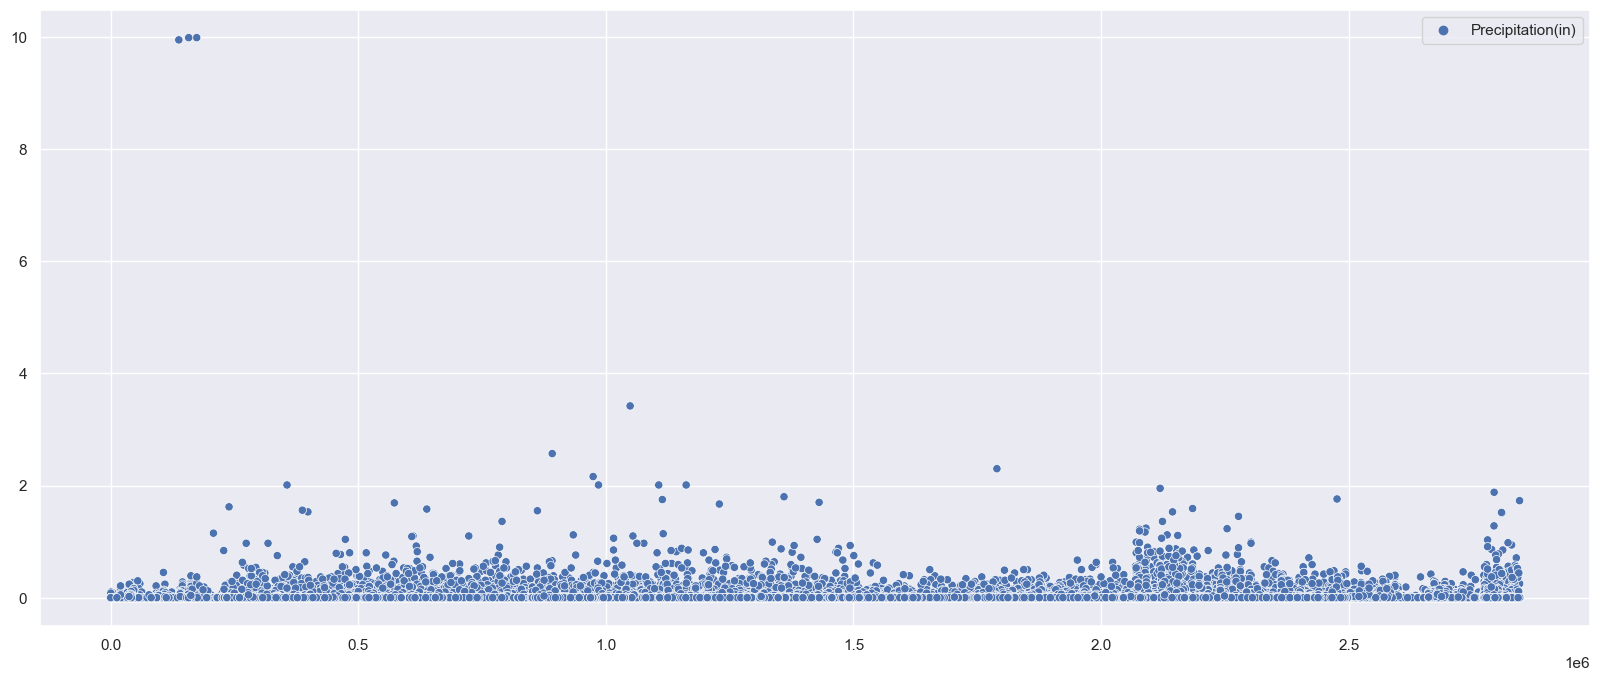

In [76]:
Precipitation = pd.DataFrame(accident_df["Precipitation(in)"])
f = plt.figure(figsize=(20, 8))
sb.scatterplot(data = Precipitation)

In [77]:
#Summary of Precipitation(in)
Precipitation_Summary = pd.DataFrame(Precipitation.describe())
Precipitation_Summary.head(8)

Precipitation(in)
count      253388.000000
mean            0.006538
std             0.054779
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max             9.990000

In [78]:
dic = {"IQR":[],
       "lower_outlier":[],
       "upper_outlier":[],}

#Calculations for IQR, upper limit and lower limit
IQR = float(Precipitation_Summary.iloc[6]) - float(Precipitation_Summary.iloc[4])
upper_limit = float(Precipitation_Summary.iloc[6][0] + 1.5*IQR)
lower_limit = float(Precipitation_Summary.iloc[4][0] - 1.5*IQR)
dic["IQR"].append(IQR)
dic["upper_outlier"].append(upper_limit)
dic["lower_outlier"].append(lower_limit)

#Convert to dataframe and then transpose
Extra_Info = pd.DataFrame(dic).transpose()

#Rename column
Extra_Info.rename(columns={0: "Precipitation(in)"}, inplace = True)

Extra_Info

Precipitation(in)
IQR                          0.0
lower_outlier                0.0
upper_outlier                0.0

In [79]:
#Number of outliers
Outlier_Count = 0

for column in Precipitation:
    #Convert values in Precipitation into a list
    list = Precipitation[column].values

    #Loop through list and count the lower and upper outliers
    for i in list:
        if i > 0 or i < 0:
            Outlier_Count += 1

print(Outlier_Count)

22563


### Since there are only 22,563 outliers which only represent 9.31%(3s.f) of the total count of 242,480, we can safely remove these outliers without losing too much data.

In [80]:
#Create a dataframe for "Severity" and "Precipitation(in)"
Joint_DF_6 = pd.DataFrame(accident_df[["Severity","Precipitation(in)"]])
for ind, row in Joint_DF_6.iterrows():
    if  row["Precipitation(in)"] < 0 or row["Precipitation(in)"] > 0:
        Joint_DF_6 = Joint_DF_6.drop(index = ind)
Joint_DF_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230825 entries, 2810728 to 2211375
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           230825 non-null  object 
 1   Precipitation(in)  230825 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.3+ MB


<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

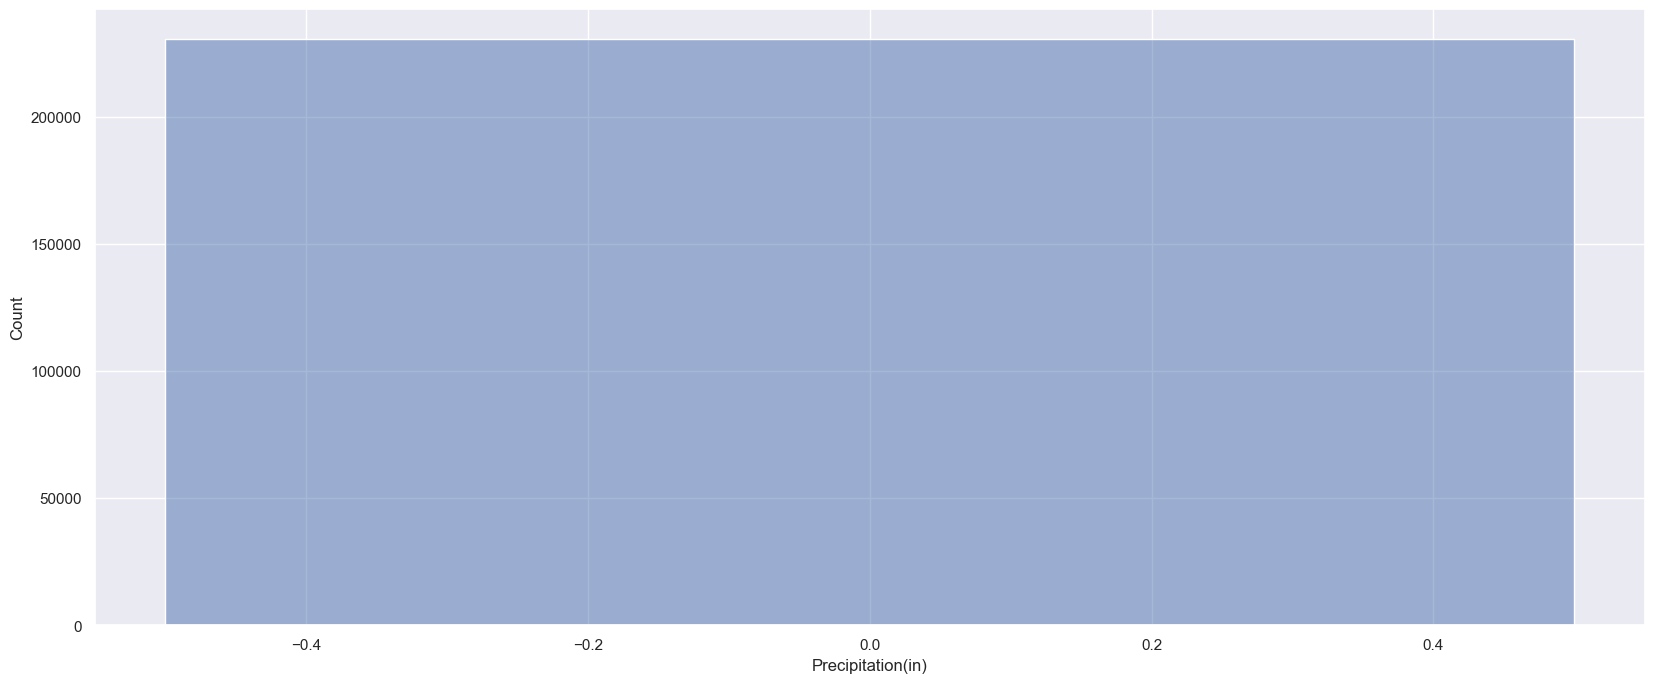

In [81]:
f = plt.figure(figsize=(20, 8))
sb.histplot(data = Joint_DF_6["Precipitation(in)"], kde = True)

Unable to run Levene test for Precipitation(in) because there is no normal distribution curve after outlier removal.

### After checking the all 7 continuous variables and whether they satisfy the necessary assumptions for a Point-Biserial Correlation, the best example to conduct a Point-Biserial Correlation is Wind_Speed(mph) because the p-value of the Levene test is high at 0.984(3s.f) after 11.9% of the data is trimmed away at both ends. The next best variable (although not as ideal as Wind_Speed(mph)) to conduct a Point-Biserial Correlation is Humidity(%) because it has the second highest p-value of the Levene test at 1.97e-23(3s.f).

In [117]:
Joint_DF_5["Severity"].replace(["Major","Minor"],[1,0], inplace = True)
pointbiserialr(Joint_DF_5["Severity"],Joint_DF_5["Wind_Speed(mph)"])

PointbiserialrResult(correlation=0.09569379633534321, pvalue=0.0)

In [118]:
Joint_DF_3["Severity"].replace(["Major","Minor"],[1,0], inplace = True)
pointbiserialr(Joint_DF_3["Severity"],Joint_DF_3["Humidity(%)"])

PointbiserialrResult(correlation=0.01783588075035289, pvalue=1.5854412068440705e-18)

### According to the Point-Biserial results, Wind_Speed(mph) has a stronger correlation to the severity of the accident as compared to the Humidity(%) because it has a higher correlation coefficient. However the correlation itself is not extremely high to factually determine whether Wind_Speed(mph) does have a concrete and clear correlation to the severity of the accident.

# Models

## Normalizing the features

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
accidentdf[features] = scaler.fit_transform(accidentdf[features])
accidentdf.head()

/var/folders/6z/84yjcf7x7pl5b8ltxz93scj40000gn/T/ipykernel_13127/2689114604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Severity          Start_Time Side    County    Weather_Timestamp  \
2810728    Major 2019-06-23 23:14:09    L     Butte  2019-06-23 22:53:00   
2209389    Major 2020-03-20 17:49:32    R   Suffolk  2020-03-20 17:56:00   
2218144    Major 2020-03-24 19:00:25    R  Davidson  2020-03-24 18:53:00   
2792571    Major 2019-05-16 16:18:00    R     Adams  2019-05-16 15:58:00   
832345     Major 2021-10-15 15:56:30    R   Daviess  2021-10-15 15:56:00   

         Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
2810728        0.762238       0.795304     0.373737      0.884452   
2209389        0.601399       0.656833     0.808081      0.887001   
2218144        0.615385       0.668874     0.898990      0.837723   
2792571        0.713287       0.753161     0.242424      0.421410   
832345         0.741259       0.777243     0.616162      0.862362   

         Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
2810728             0.1              E         0.038793           0.000000   
2209389             0.1              S         0.064655           0.000000   
2218144             0.1              W         0.012931           0.006006   
2792571             0.1              S         0.043103           0.000000   
832345              0.1              W         0.034483           0.000000   

        Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  \
2810728             Clear    False  False     False     False     False   
2209389             Clear    False  False      True     False     False   
2218144             Clear    False  False     False     False     False   
2792571             Clear    False  False     False     False     False   
832345              Clear    False  False     False     False     False   

         No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
2810728    False    False       False    False  False            False   
2209389    False    False       False    False  False            False   
2218144    False    False       False    False  False            False   
2792571    False    False       False    False  False            False   
832345     False    False       False    False  False            False   

         Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
2810728           False         False          Night          Night   
2209389            True         False            Day            Day   
2218144           False         False            Day            Day   
2792571           False         False            Day            Day   
832345             True         False            Day            Day   

        Nautical_Twilight Astronomical_Twilight  Year  
2810728             Night                 Night  2019  
2209389               Day                   Day  2020  
2218144               Day                   Day  2020  
2792571               Day                   Day  2019  
832345                Day                   Day  2021

In [1]:
# Metric dictionary
accuracy = dict()

## Logistic Regression

In [121]:
# Import essential models and functions from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [122]:
#Split Dataset into Training and Testing
y_sample = accidentdf["Severity"]
X_sample = accidentdf[["Wind_Speed(mph)", "Humidity(%)"]]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(181860, 2) (181860,)
(60620, 2) (60620,)


In [123]:
#Accuracy scores of Logistic Regression Model
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'saga'}
Train score: 0.5406851424172441
Validation score: 0.5408940943582976


In [124]:
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Test score:", lr.score(X_test, y_test))

Default scores:
Train score: 0.540921588034752
Test score: 0.5411745298581326


In [125]:
#Save logistic regression accuracy
y_pred = lr.predict(X_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)

### Confusion Matrix of Logistic Regression

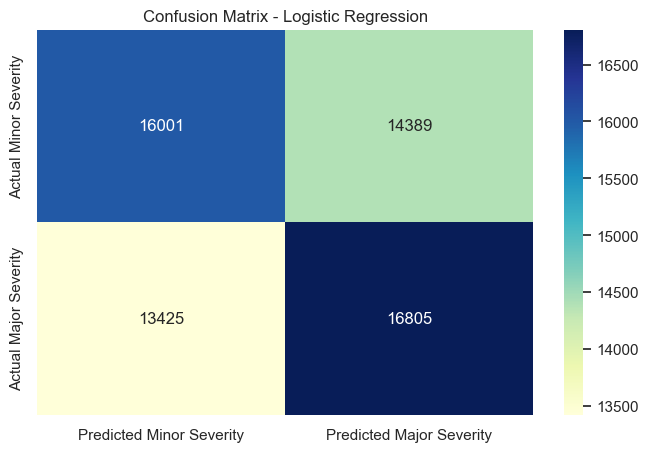

In [126]:
#Confusion Matrix of Logistic Regression Model
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Minor Severity", "Actual Major Severity"]
columns = ["Predicted Minor Severity", "Predicted Major Severity"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Random Forest

In [127]:
#Split dataset into Training and Testing
y_sample = accidentdf["Severity"]
X_sample = accidentdf[["Wind_Speed(mph)", "Humidity(%)"]]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(181860, 2) (181860,)
(60620, 2) (60620,)


In [128]:
#Accuracy scores of Random Forest
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Test score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 10, 'n_estimators': 100}
Train score: 0.5638623116683162
Test score: 0.5559881227317717


In [129]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Test score:", rfc.score(X_test, y_test))

Default scores:
Train score: 0.5739579896623777
Test score: 0.5522434839986803


In [130]:
#Prediction for Random Forest
y_pred = rfc.predict(X_test)
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)

### Confusion Matrix for Random Forest

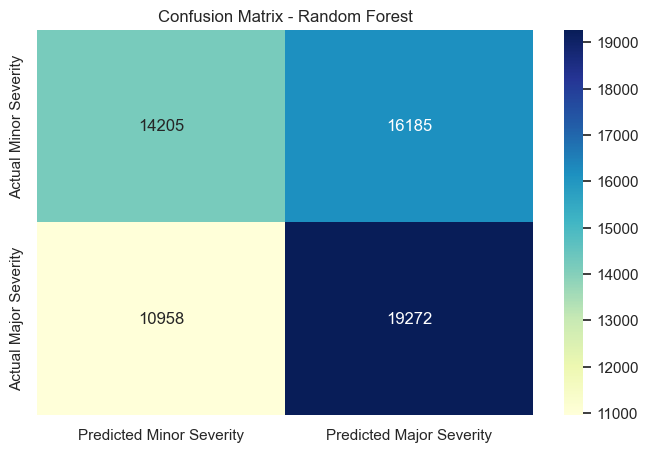

In [131]:
#Confusion Matrix of Random Forest
y_pred = rfc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Minor Severity", "Actual Major Severity"]
columns = ["Predicted Minor Severity", "Predicted Major Severity"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Results

[Text(0, 0, '0.541175'), Text(0, 0, '0.552243')]

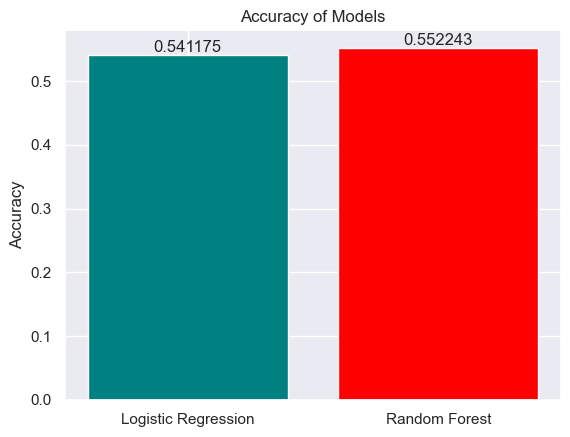

In [132]:
#Accuracy of Logistic Regression and Random Forest Tree
keys = accuracy.keys()
values = accuracy.values()

fig, ax=plt.subplots()

bar = ax.bar(keys, values, color=["teal","red"])
ax.set(ylabel='Accuracy', title='Accuracy of Models')
ax.bar_label(bar)

### We used accuracy as a metric for comparison and we can see that both models have relatively high accuracy as it is above 0.5% but here, random forest classification model outperforms the logistic regression model by a small margin.

However, even though the accuracy is relatively well, the model is not very reliable as we can see from the confusion matrix earlier which shows us that the false positive rate (53.26%) and false negative rates (36.25%) are very high. 

# Data-driven insights and Recomendations

- Model predicts Major accidents better than Minor accidents but its not reliable
- Wind Speeds & Humidity correlates to accidents in general 

Accidents may occur as trucks and other vehicles with a high profile are typically more susceptible to high winds, causing them to become overturned on highways and cause an accident. An estimated 423 people die every year during collisions between cars and semi-trucks, according to the National Highway Safety Administration.
Humity impact sensors in vehicles and puts stress on car engines which can result in a shorter lifespan and more frequent repairs.

Recommendations for Wind Speed:
- Be aware of high-profile vehicles
- Keep a distance from vehicles
- Watch the weather

Drivers should pay extra attention to the road and anticipate gusts in windy conditions. Maintain a safe distance from other vehicles to give yourself and other motorists time and space to avoid any debris in the road. Weather service offices may issue high-wind watches, warnings, or advisories when winds will make it difficult to drive

Recommendations for Humidity:
- Regular maintenance
- Install dehumidifiers

Routinely maintenance schedule will correct any minor issues before they can evolve into major ones. Even in a shaded garage, humidity might still be a problem. Removing humid air from the torage area is the key. A dehumidifier works well in smaller spaces, and properly constructed and insulated exterior walls will reduce the level of indoor humidity.
